<a href="https://colab.research.google.com/github/isDoroninMaksim/edu_projects/blob/main/Review_DS46_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ревью проекта "Сахарный диабет" для группы DS46

## СИЛЬНЫЕ СТОРОНЫ

- Проект отличается продуманной структурой: от загрузки и первичного анализа данных до обучения моделей и формулировки выводов.

- Признаки подробно описаны с медицинскими комментариями, что помогает лучше понять результаты.

- Авторы рассмотрели несколько подходов к формированию датасетов и сравнили их эффективность.

- Для обучения использовались разные модели с подбором гиперпараметров, при этом были учтены мультиколлинеарность, возможная утечка данных и аномалии.

- Анализ ошибок и важности признаков дополнен медицинской интерпретацией, что повышает прикладную ценность работы.

**Основные замечания:**

1. **Исключение признаков**

Признак Гликированный_гемоглобин исключён как прямой маркер диабета, но не показано его влияние на таргет — стоит обосновать решение.

2. **Обработка аномалий**

В признаках Тромбоэмболический_синдром, ВПС, ХОБЛ_ЕСТЬ_НЕТ_, ИБС_ПИКС есть несоответствующие значения, замены сделаны без пояснений. Рекомендуется указать, почему выбрана именно такая коррекция и показать данные до/после (сейчас до/после абсолютно одинаковые значения).

3. **Выбор модели**

Финальная модель выбрана без подробного анализа. Рекомендуется указать, какая модель выбрана и почему, с опорой на метрики и устойчивость.

<mark> Ниже мы оставили рекомендации, которые помогут сделать проект ещё более завершённым. Для удобства все они выделены жёлтым цветом. </mark>

<h1> Прогноз риска диабета
   <a class="tocSkip"> </h1>

**Описание проекта**

Предсказание риска диабета позволит врачам и пациентам получать предварительную оценку состояния и вовремя предпринимать необходимые действия.

**Цель проекта:**

- Разработать модель машинного обучения, которая на основании медицинских показателей сможет предсказать риск диабета.

**Ход исследования**

+ Подготовка данных: загрузка и изучение общей информации из предоставленного датасета
+ Предобработка данных: обработка пропущенных значений, корректировка типов данных, дубликатов и других аномалий
+ Исследовательский анализ данных: изучение основных параметров объектов, их распределения, зависимостей от различных характеристик, корреляционный анализ
+ Разработка модели МО: кодирование, масштабирование данных, поиск лучшей модели МО и подбор лучших гиперпараметров, сравнение оценочных метрик
+ Резюмирование полученных результатов, формулировка ключевых выводов

**Описание данных**

Данные состоят из датасета `diabetes_ds.xlsx`

1. Общие данные пациента

`Номер` - идентификатор записи

`Перенес/ не перенес КВИ`	— перенес ли пациент COVID-19

`Возраст`,`Пол`,`Рост, см`,`Вес, кг`,`ИМТ 2 (ФОРМУЛА EXCEL)` - антропометрические показатели и индекс массы тела

`СТЕПЕНИ ОЖИРЕНИЯ ПО ИМТ`

`ОЖИРЕНИЕ (ЕСТЬ\НЕТ)`

2. Общий анализ крови

`Эритроциты` ,`Гемоглобин`, `Цветовой показатель`, `Лейкоциты`, `Лимфоциты%`, `ЛИМФОЦИТЫ, АБС (РАСЧЕТ ПО ФОРМУЛЕ)`, `Тромбоциты`, `СОЭ`

3. Биохимия крови

`Холестерин`, `ЛПНП`, `ЛПВП`, `Индекс атерогенности 2 (формула excel)`, `Глюкоза`, `Гликированный гемоглобин`, `СРБ`, `Ферритин`, `Прокальцитонин`, `Альбумин`, `Лактат`, `ЛДГ`, `АЛТ`, `АСТ`, `Общий билирубин`, `Натрийуретический пептид`, `Мочевина`, `Креатинин, мкмоль/л`, `СКФ CKD-EPI (расчет по общей формуле)`, `Натрий`, `Калий`

4. Коагулограмма

`АЧТВ`, `МНО`, `Фибриноген`, `D-димер`

5. Приём препаратов

`Фавипиравир`, `Молнупиравир`, `Гидрохлортиазид`, `Фуросемид`, `Торасемид`, `Спиронолактон`, `Валсартан`, `Телмисартан`, `Лозартан`, `Кандесартан`, `Изосорбида динитрат`, `Периндоприл`, `Рамиприл`, `Эналаприл`, `Лизиноприл`, `Бисопролол`, `Карведилол`, `Атенолол`, `Верапамил`, `Дилтиазем`, `Леркамен`, `Амлодипин`, `Дигоксин`, `Ивабрадин`, `Гиполипидемические препараты (статины)`, `Антикоагулянты, препарат`, `Антикоагулянты, препарат 2`, `Антиагреганты, препарат 1`, `Антиагреганты, препарат 2`, `Триметазидин`, `Метформин`, `Дапаглифлозин`

6. Сопутствующие диагнозы

`BPB голеней`, `BPB голеней (ЕСТЬ/НЕТ)`	- варикозная болезнь

`Тромбоэмболический синдром`

`ВПС` - врождённый порок сердца

`НЕАЖБП` - неалкогольная жировая болезнь печени

`Гипертрофия миокарда левого желудочка по ЭКГ или ЭХО-КГ`, `Гипертрофия миокарда левого желудочка по ЭКГ или ЭХО-КГ (комментарий)`, `Блокада НП Гисса`, `Блокада НП Гисса (комментарий)`, `Удлинение интервала QT`, `AV- блокада`,

`ХБП (исходн)`, `ХБП (расчет по СКФ)`, `ХБП (ЕСТЬ\НЕТ)` — хроническая болезнь почек

`Мерцательная аритмия`, `Мерцательная аритмия (ЕСТЬ\НЕТ)`, `Аблация`

`АКШ` - аортокоронарное шунтирование

`БА`, `БА (ЕСТЬ/НЕТ)` - бронхиальная астма

`ХОБЛ`, `ХОБЛ (ЕСТЬ\НЕТ)` - хроническая обструктивная болезнь лёгких

`ИБС. Стенокардия`, `ИБС. Стенокардия (ЕСТЬ\НЕТ)`, `ИБС. ПИКС`, `ИБС. ПИКС (ЕСТЬ\НЕТ)`

`АГ, стадия`, `АГ (ЕСТЬ\НЕТ)`, `АГ, степень`, `АГ, риск` — артериальная гипертензия

`ХСН, стадии`, `ХСН, ФК`, `ХСН по фракции выброса, %` — хроническая сердечная недостаточность

`Сахарный диабет (ЕСТЬ\НЕТ)` - целевая переменная

<h3> Импорт библиотек<a class="tocSkip"> </h3>

In [ ]:
import sys
print(sys.executable)

/opt/anaconda3/envs/practicum/bin/python


In [ ]:
!pip install --upgrade pip setuptools wheel

In [ ]:
!pip install -r requirements_pip.txt

  Using cached anyio-4.9.0-py3-none-any.whl.metadata (4.7 kB)
  Using cached asttokens-3.0.0-py3-none-any.whl.metadata (4.7 kB)
  Using cached async_lru-2.0.5-py3-none-any.whl.metadata (4.5 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached babel-2.17.0-py3-none-any.whl.metadata (2.0 kB)
  Using cached beautifulsoup4-4.12.2-py3-none-any.whl.metadata (3.6 kB)
  Using cached bleach-6.2.0-py3-none-any.whl.metadata (30 kB)
  Using cached certifi-2025.8.3-py3-none-any.whl.metadata (2.4 kB)
  Using cached charset_normalizer-3.4.2-cp311-cp311-macosx_10_9_universal2.whl.metadata (35 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)
  Using cached debugpy-1.8.14-cp311-cp311-macosx_14_0_universal2.whl.metadata (1.3 kB)
  Using cached decorator-5.2.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached exceptiongroup-1.3

  Using cached jupyter_client-8.6.3-py3-none-any.whl.metadata (8.3 kB)
  Using cached jupyter_events-0.12.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached jupyter_server-2.16.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached jupyterlab-4.4.2-py3-none-any.whl.metadata (16 kB)
  Using cached jupyterlab_widgets-3.0.15-py3-none-any.whl.metadata (20 kB)
  Using cached lxml-5.4.0-cp311-cp311-macosx_10_9_universal2.whl.metadata (3.5 kB)
  Using cached MarkupSafe-3.0.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (4.0 kB)
  Using cached matplotlib-3.7.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.6 kB)
  Using cached mistune-3.1.3-py3-none-any.whl.metadata (1.8 kB)
  Using cached narwhals-2.4.0-py3-none-any.whl.metadata (11 kB)
  Using cached nbclassic-1.3.2-py3-none-any.whl.metadata (5.5 kB)
  Using cached nbclient-0.10.2-py3-none-any.whl.metadata (8.3 kB)
  Using cached nbconvert-7.16.6-py3-none-any.whl.metadata (8.5 kB)
  Using cached nltk-3.8.1-py3-none-any.whl.metadata (2.8 kB)
  Usi

<mark> Файл requirements.txt получился перегруженным (150 строк), так как туда попало всё окружение Jupyter. Реально в проекте используется около 10–15 библиотек (pandas, numpy, scikit-learn, matplotlib, seaborn и др.). Стоит оставить только их, тогда requirements станет компактным и удобным для установки.<mark>

In [ ]:
!pip install -q shap phik seaborn==0.11.1 openpyxl

In [ ]:
# Импорт основных библиотек
import pandas as pd
import numpy as np
import math
import shap
import phik
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Импорт библиотек для создания прогнозной модели
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.inspection import permutation_importance

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report, balanced_accuracy_score, f1_score, precision_score, ConfusionMatrixDisplay, make_scorer
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.feature_selection import SelectKBest, SelectFromModel
from phik.report import plot_correlation_matrix
from sklearn.base import BaseEstimator, TransformerMixin

# настройка графического отображения
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
from matplotlib import rcParams, rcParamsDefault
rcParams['figure.figsize'] = 8,4 # устанавливаем размеры фигуры
%config InlineBackend.figure_format = 'svg' # устанавливаем формат изображения как SVG
factor = 0.8 # фактор, который будет использоваться для изменения параметра dpi.
default_dpi = rcParamsDefault['figure.dpi'] # извлекаем значение по умолчанию для точек на дюйм (dpi)
rcParams['figure.dpi'] = default_dpi*factor # Эта строка устанавливает разрешение (dpi) для всех фигур.

# настройки отображения
pd.options.display.float_format ='{:,.3f}'.format
pd.set_option('display.max_columns', None)

# константы
RANDOM_STATE=654321
TEST_SIZE = 0.3

<mark> Рекомендуем отделить блок импортов библиотек от объявления констант и привести импорты к более компактному виду, например, сгруппировав sklearn.feature_selection в один вызов. Это улучшит читаемость и сделает структуру кода более аккуратной.
 </mark>

<h3> Загрузка данных<a class="tocSkip"> </h3>

In [ ]:
# загрузим данные из xlsx-файла
# try:
#     df  = pd.read_excel(
#     "C:\\Data-science\\ds_csv\\diabetes_ds.xlsx",
#     sheet_name='данные',
#     engine='openpyxl'
# )
# except:
#     pass

try:
    df = pd.read_excel('diabetes_ds.xlsx')
except:
    pass


# Проверяем
df.head()

Номер  Перенес/ не перенес КВИ  Возраст   Пол  Рост, см  Вес, кг  \
0 390.000                    1.000   68.000 2.000   158.000   86.000   
1 337.000                    1.000   54.000 1.000   180.000  119.000   
2 160.000                    1.000   68.000 1.000   174.000  110.000   
3 166.000                    1.000   67.000 1.000   189.000  110.000   
4 439.000                    1.000   60.000 1.000   178.000  115.000   

   ИМТ 2 (ФОРМУЛА EXCEL)  Эритроциты  Гемоглобин  Цветовой показатель  \
0                 34.450       5.330     163.000                0.000   
1                 36.728       5.010     130.000                0.000   
2                 36.332         NaN     161.000                0.000   
3                 30.794       4.470     134.000                0.000   
4                 36.296       5.440     166.000                0.000   

   Лейкоциты  Лимфоциты%   ЛИМФОЦИТЫ, АБС (РАСЧЕТ ПО ФОРМУЛЕ)  Тромбоциты  \
0      9.610       31.900                               3.066     201.000   
1     10.480       19.000                               1.991     288.000   
2      5.400       25.600                               1.382     114.000   
3      8.500       13.300                               1.131     175.000   
4      9.060       28.300                               2.564     226.000   

     СОЭ  Холестерин  ЛПНП  ЛПВП  Индекс атерогенности 2 (формула excel)  \
0  8.000       4.140 2.250 0.970                                   3.268   
1  5.000       3.430 1.310 1.190                                   1.882   
2 10.000       4.230 2.690 0.940                                   3.500   
3  5.000         NaN   NaN   NaN                                     NaN   
4  5.000       3.250 1.450 1.300                                   1.500   

   Глюкоза  Гликированный гемоглобин    СРБ  Ферритин  Прокальцитонин  \
0    5.770                     6.500  0.190       NaN             NaN   
1    5.910                     6.100    NaN       NaN             NaN   
2    6.610                       NaN    NaN       NaN             NaN   
3    4.980                       NaN 20.350       NaN             NaN   
4    9.480                     7.200    NaN       NaN             NaN   

   Альбумин  Лактат     ЛДГ    АЛТ    АСТ  Общий билирубин  \
0       NaN     NaN     NaN 24.000 21.000              NaN   
1    46.000     NaN     NaN 12.000 14.000              NaN   
2       NaN     NaN     NaN 16.500 20.700           18.100   
3    43.600     NaN 327.000 17.900 23.800           23.300   
4       NaN     NaN     NaN    NaN    NaN              NaN   

   Натрийуретический пептид  Мочевина  Креатинин, мкмоль/л  \
0                   197.700       NaN               79.800   
1                 2,358.000    10.100              107.280   
2                       NaN       NaN              106.200   
3                   454.600    10.780               91.200   
4                   280.700     3.200               81.700   

   СКФ CKD-EPI (расчет по общей формуле)  Натрий  Калий   АЧТВ   МНО  \
0                                 65.460     NaN  5.760    NaN   NaN   
1                                 67.224 140.400  4.380 38.200 2.340   
2                                 61.677 140.600  4.300 33.700   NaN   
3                                 74.666 140.600  4.000 26.300 1.090   
4                                 89.585     NaN    NaN    NaN   NaN   

   Фибриноген  D-димер  Фавипиравир  Молнупиравир  Гидрохлортиазид  Фуросемид  \
0         NaN      NaN        0.000         0.000            0.000      0.000   
1       3.710      NaN        0.000         0.000            0.000      0.000   
2         NaN      NaN        0.000         0.000            0.000      1.000   
3       3.680      NaN        1.000         0.000            0.000      0.000   
4         NaN      NaN        0.000         0.000            0.000      0.000   

   Торасемид  Спиронолактон  Валсартан  Телмисартан  Лозартан  Кандесартан  \
0      1.000          1.000  

<mark> Закомментированные блоки с альтернативной загрузкой данных лучше удалить, если они больше не используются. Это сделает код компактнее и избавит от лишнего визуального шума при проверке.<mark>

<h3> Необходимые функции<a class="tocSkip"> </h3>

In [ ]:
# Обзор данных

def review(data, num_col_names_discr=[], num_col_names_cont=[]):
    data.info()
    print('\n' + '-*'*50)
    print('\n' + 'Распределение значений')
    display(data.describe())

    cat_col_names = data.select_dtypes(exclude='number').columns.tolist()

    print('\n' + '-*'*50)
    print('\n' + 'Обзор')
    display(data.head(10))

    print('\n' + '-*'*50)
    print(f'Количество явных дубликатов: {data.duplicated().sum()}')

    print('\n' + '-*'*50)
    print('\n' + 'Пропуски')
    display(data.isna().sum().sort_values(ascending=False))

    # --- распределение количественных непрерывных ---
    print('\n' + '-*'*50)
    print('\n' + 'Распределение количественных непрерывных величин')
    if num_col_names_cont:
        cols = 5
        rows = (len(num_col_names_cont) + cols - 1) // cols
        fig, axes = plt.subplots(rows, cols, figsize=(cols*2, rows*2))
        axes = axes.flatten()
        for i, c in enumerate(num_col_names_cont):
            sns.histplot(data[c], bins=20, ax=axes[i], color="skyblue")
            axes[i].set_title(c, fontsize=7)
            axes[i].set_xlabel("Значение", fontsize=7)
            axes[i].set_ylabel("Частота", fontsize=7)
            axes[i].tick_params(axis="both", labelsize=7)
        for j in range(i+1, len(axes)):
            fig.delaxes(axes[j])
        plt.tight_layout()
        plt.show()

    # --- распределение количественных дискретных ---
    print('\n' + '-*'*50)
    print('\n' + 'Распределение количественных дискретных величин')
    if num_col_names_discr:
        cols = 5
        rows = (len(num_col_names_discr) + cols - 1) // cols
        fig, axes = plt.subplots(rows, cols, figsize=(cols*2, rows*2))
        axes = axes.flatten()
        for i, c in enumerate(num_col_names_discr):
            group = data[c].value_counts()
            sns.barplot(x=group.index, y=group.values, ax=axes[i], color="lightcoral")
            axes[i].set_title(c, fontsize=7)
            axes[i].set_xlabel("Значение", fontsize=7)
            axes[i].set_ylabel("Количество", fontsize=7)
            axes[i].tick_params(axis="both", labelsize=7)
        for j in range(i+1, len(axes)):
            fig.delaxes(axes[j])
        plt.tight_layout()
        plt.show()

    # --- уникальные значения категориальных ---
    print('\n' + '-*'*50)
    print('\n' + 'Уникальные значения категориальных признаков' + '\n')
    for c in cat_col_names:
        print(c, ':', data[c].unique())

In [ ]:
# приведение названий колонок и значений датафрейма к "змеиному" типу

def clean_columns(df, translit=False):
    new_cols = []
    for col in df.columns:
        # при необходимости переводим кириллицу в латиницу
        if translit:
            col = unidecode(col)
        # убираем пробелы в начале/конце
        col = col.strip()
        # заменяем пробелы на подчеркивания
        col = col.replace(" ", "_")
        # убираем спецсимволы, оставляем буквы, цифры и "_"
        col = re.sub(r'[^0-9a-zA-Zа-яА-Я_]', '_', col)
        # несколько подряд идущих "_" сжимаем в один
        col = re.sub(r'_+', '_', col)
        new_cols.append(col)
    df.columns = new_cols
    return df

In [ ]:
# функция для построения гистограмм и боксплотов для непрерывных признаков

def plot_numeric_distributions(
    df: pd.DataFrame,
    columns: list,
    cols: int = 4,            # сколько признаков в строке (по колонкам)
    bins: int = 50,
    figsize_cell=(2.5, 2.0),  # размер одной "ячейки" (ширина, высота)
    title_fs=7, label_fs=7, tick_fs=7,
    percentile_clip: tuple | None = None,  # например (0.5, 99.5)
    log_hist: bool = False
):
    cols_present = [c for c in columns if c in df.columns]
    if not cols_present:
        raise ValueError("Ни одна из указанных колонок не найдена в DataFrame.")

    n = len(cols_present)
    row_pairs = math.ceil(n / cols)     # пар "hist+box"
    rows = row_pairs * 2                # строк всего (hist и box)
    fig_w = cols * figsize_cell[0]
    fig_h = row_pairs * 2 * figsize_cell[1]

    fig, axes = plt.subplots(rows, cols, figsize=(fig_w, fig_h))
    # гарантируем форму (rows, cols) даже при cols=1
    axes = np.array(axes).reshape(rows, cols)

    for i, c in enumerate(cols_present):
        # числовая очистка
        s = pd.to_numeric(df[c], errors="coerce").replace([np.inf, -np.inf], np.nan).dropna()
        if percentile_clip is not None and len(s):
            lo, hi = np.percentile(s, [percentile_clip[0], percentile_clip[1]])
            s = s.clip(lower=lo, upper=hi)

        r_base = (i // cols) * 2   # верхняя строка пары (hist)
        cc = i % cols

        ax_hist = axes[r_base, cc]
        ax_box  = axes[r_base + 1, cc]

        # Гистограмма (сверху)
        sns.histplot(s, bins=bins, ax=ax_hist, kde=False, stat="count", color="skyblue")
        if log_hist:
            ax_hist.set_xscale("log")
        ax_hist.set_title(f"{c} — гистограмма", fontsize=title_fs)
        ax_hist.set_xlabel("Значение", fontsize=label_fs)
        ax_hist.set_ylabel("Частота", fontsize=label_fs)
        ax_hist.tick_params(axis='both', labelsize=tick_fs)

        # Boxplot (снизу)
        sns.boxplot(x=s, ax=ax_box, color="lightcoral")
        ax_box.set_title(f"{c} — boxplot", fontsize=title_fs)
        ax_box.set_xlabel("Значение", fontsize=label_fs)
        ax_box.tick_params(axis='both', labelsize=tick_fs)

    # скрываем пустые ячейки (если сетка больше фактического числа признаков)
    total_slots = row_pairs * cols
    for idx in range(n, total_slots):
        r_base = (idx // cols) * 2
        cc = idx % cols
        for r in (r_base, r_base + 1):
            axes[r, cc].set_visible(False)

    plt.tight_layout()
    plt.show()

    stats = df[cols_present].apply(pd.to_numeric, errors="coerce").describe().T
    return stats

In [ ]:
# функция построения распределения целевого признака

def plot_target_distribution(y, title=None, bins=50, max_cat=20):
    y = pd.Series(y, name=getattr(y, 'name', 'target'))
    y_num = pd.to_numeric(y, errors='coerce')
    is_numeric = y_num.notna().mean() > 0.9 and y.nunique(dropna=True) > max_cat

    if is_numeric:
        s = y_num.dropna()
        fig, ax = plt.subplots(figsize=(6, 3.5))
        plt.hist(s, bins=bins)
        ax.set_xlabel(y.name or "target"); ax.set_ylabel("Частота")
        ax.set_title(title or f"Распределение целевого признака (n={len(s)})")
        plt.tight_layout(); plt.show()
    else:
        s = y.astype('object')
        vc = s.value_counts(dropna=False)
        total = int(vc.sum())
        classes = [str(c) for c in vc.index]

        fig, ax = plt.subplots(figsize=(6, 3.5))
        ax.bar(classes, vc.values)                     # <- СЫРЫЕ КОЛИЧЕСТВА
        ax.set_ylim(0, vc.max() * 1.15)               # небольшой запас по оси Y
        ax.set_xlabel(y.name or "target"); ax.set_ylabel("Количество")
        ax.set_title(title or f"Распределение целевого признака (n={total})")

        # проценты над столбцами
        for i, cnt in enumerate(vc.values):
            ax.annotate(f"{cnt/total*100:.1f}%", (i, cnt), ha="center", va="bottom",
                        xytext=(0, 3), textcoords="offset points", fontsize=9)

        plt.tight_layout(); plt.show()

        display(pd.DataFrame({
            "class": classes,
            "count": vc.values,
            "percent": (vc/total*100).round(2).values
        }))


In [ ]:
# функция строит KDE-графики для списка числовых признаков по двум классам таргета

def plot_kde_by_target(
    df: pd.DataFrame,
    features: list,
    target: str,
    pos_val=1, neg_val=0,
    cols: int = 3,
    figsize_cell=(3.0, 2.0),
    bins=None,
    percentile_clip: tuple | None = None,  # напр. (0.5, 99.5)
    title_prefix: str = 'График плотности для',
    label_pos: str = 'есть',
    label_neg: str = 'нет'
):
    """Рисует KDE для каждого признака: сверху — класс pos_val, поверх — класс neg_val."""
    # оставим только реально существующие признаки
    feats = [c for c in features if c in df.columns]
    if not feats:
        raise ValueError("Ни одного из указанных признаков нет в DataFrame.")

    n = len(feats)
    rows = math.ceil(n / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(cols*figsize_cell[0], rows*figsize_cell[1]), squeeze=False)
    axes = axes.ravel()

    for i, col in enumerate(feats):
        ax = axes[i]

        # данные по классам → numeric
        s_pos = pd.to_numeric(df.loc[df[target] == pos_val, col], errors='coerce')
        s_neg = pd.to_numeric(df.loc[df[target] == neg_val, col], errors='coerce')

        # очистка
        s_pos = s_pos.replace([np.inf, -np.inf], np.nan).dropna()
        s_neg = s_neg.replace([np.inf, -np.inf], np.nan).dropna()

        # опциональный клип по перцентилям (считаем по объединению)
        if percentile_clip is not None:
            both = pd.concat([s_pos, s_neg], axis=0)
            if len(both):
                lo, hi = np.percentile(both, [percentile_clip[0], percentile_clip[1]])
                s_pos = s_pos.clip(lo, hi)
                s_neg = s_neg.clip(lo, hi)

        # отрисовка (отдельная нормализация, чтобы площади были сопоставимы)
        if len(s_pos):
            sns.kdeplot(x=s_pos, ax=ax, fill=True, common_norm=False, label=label_pos)
        if len(s_neg):
            sns.kdeplot(x=s_neg, ax=ax, fill=True, common_norm=False, label=label_neg)

        ax.set_title(f'{title_prefix} {col}', fontsize=8)
        ax.set_xlabel(col, fontsize=7)
        ax.set_ylabel("Плотность", fontsize=7)
        ax.legend(title=None, fontsize=7)
        ax.tick_params(axis='both', labelsize=7)

    # скрыть пустые ячейки сетки
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
    return fig, axes


In [ ]:
# функция строит графики для списка категориальных признаков по двум классам таргета

def plot_categorical_grid(df, cols, target=None, per_row=5, top_n=12, rotate=35,
                          figsize_scale=(2.5, 2.0), normalize=False,
                          legend_loc='upper center', legend_ncol=None, legend_outside=True):
    n = len(cols)
    if n == 0:
        print("Пустой список признаков.")
        return

    rows = (n + per_row - 1) // per_row
    fig, axes = plt.subplots(rows, per_row,
                             figsize=(per_row*figsize_scale[0], rows*figsize_scale[1]),
                             squeeze=False)
    axes = axes.flatten()

    has_target_global = target is not None and target in df.columns
    legend_handles, legend_labels = None, None

    for i, c in enumerate(cols):
        ax = axes[i]
        s = df[c].astype("object").where(df[c].notna(), other="NaN")

        vc = s.value_counts(dropna=False)
        keep = set(vc.index[:top_n])
        s = s.where(s.isin(keep), other="Другое")

        tmp = pd.DataFrame({c: s})
        if has_target_global:
            tmp[target] = df[target].astype("object").where(df[target].notna(), "NaN")

        if normalize:
            if has_target_global:
                counts = tmp.groupby([c, target]).size().reset_index(name="n")
                counts["percent"] = counts.groupby(c)["n"].transform(lambda x: 100 * x / x.sum())
                sns.barplot(data=counts, x=c, y="percent", hue=target, ax=ax)
                ax.set_ylabel("%", fontsize=8)
            else:
                data_plot = (tmp[c].value_counts(normalize=True) * 100).reset_index()
                data_plot.columns = [c, "percent"]
                sns.barplot(data=data_plot, x=c, y="percent", ax=ax, color="steelblue")
                ax.set_ylabel("%", fontsize=8)
        else:
            if has_target_global:
                sns.countplot(data=tmp, x=c, hue=target, ax=ax)
                ax.set_ylabel("Количество", fontsize=8)
            else:
                sns.countplot(data=tmp, x=c, ax=ax, color="steelblue")
                ax.set_ylabel("Количество", fontsize=8)

        ax.set_title(c, fontsize=9)
        ax.set_xlabel("")
        ax.tick_params(axis="x", labelrotation=rotate, labelsize=7)
        ax.tick_params(axis="y", labelsize=7)

        # Скрываем локальные легенды, но забираем хэндлы/лейблы с первой оси
        if has_target_global:
            if legend_handles is None:
                legend_handles, legend_labels = ax.get_legend_handles_labels()
            leg = ax.get_legend()
            if leg is not None:
                leg.remove()

    # удалить пустые оси
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    # Единая легенда
    if has_target_global and legend_handles:
        if legend_ncol is None:
            legend_ncol = min(len(legend_labels), 6)
        if legend_outside:
            fig.legend(legend_handles, legend_labels, title=target, loc='center left',
                       bbox_to_anchor=(1.01, 0.5), frameon=False, fontsize=8, title_fontsize=8, ncol=1)
            plt.tight_layout(rect=(0, 0, 0.88, 1))  # место справа под легенду
        else:
            fig.legend(legend_handles, legend_labels, title=target, loc=legend_loc,
                       frameon=False, fontsize=10, title_fontsize=10, ncol=legend_ncol)
            plt.tight_layout(rect=(0, 0, 1, 0.97))  # место сверху под легенду

    plt.show()

In [ ]:
# функция отбора ТОП признаков по корреляции с целевым по PhiK

class SelectByPhik(BaseEstimator, TransformerMixin):
    """
    Считает PhiK признаков с целевой и оставляет top_k.
    Работает и с числовыми, и с категориальными (phik делает автобиннинг).
    """
    def __init__(self, target, top_k=30, interval_cols=None):
        self.target = target
        self.top_k = top_k
        self.interval_cols = interval_cols or []
        self.selected_cols_ = None

    def fit(self, X, y=None):
        from phik import phik_matrix
        df = X.copy()
        df[self.target] = y.values if isinstance(y, pd.Series) else y
        # только те интервальные, что реально есть в X
        inter = [c for c in self.interval_cols if c in df.columns]
        phik_mat = df.phik_matrix(interval_cols=inter)
        # берём столбец корреляций с целевой (исключая саму целевую)
        s = phik_mat[self.target].drop(index=self.target, errors="ignore").sort_values(ascending=False)
        self.selected_cols_ = list(s.head(self.top_k).index)
        return self

    def transform(self, X):
        return X[self.selected_cols_]

    def get_feature_names_out(self, input_features=None):
        return np.array(self.selected_cols_)

TARGET = "Сахарный_диабет_ЕСТЬ_НЕТ_"

In [ ]:
# функция выдачи результатов работы модели

def results(model):
    results = model.cv_results_
    best_index = model.best_index_
    best_score = model.best_score_
    params = results['params'][best_index]
    fit_time = results['mean_fit_time'][best_index]
    predict_time = results['mean_score_time'][best_index]
    return params, best_score, fit_time, predict_time


In [ ]:
# получение важности признаков

def get_ct_feature_names(ct, input_features):
    out = []
    for name, trans, cols, _ in ct._iter(fitted=True):
        # получить список имен исходных столбцов для этого блока
        if isinstance(cols, slice):
            cols = input_features[cols]
        elif isinstance(cols, (np.ndarray, list, tuple)):
            cols = list(cols)
        else:
            cols = [cols]

        def names_from_trans(t, cols_for_t):
            # Если это пайплайн — смотрим на последний шаг
            from sklearn.pipeline import Pipeline
            from sklearn.preprocessing import OneHotEncoder
            if isinstance(t, Pipeline):
                last = t.steps[-1][1]
                if hasattr(last, "get_feature_names_out"):
                    if isinstance(last, OneHotEncoder):
                        return list(last.get_feature_names_out(cols_for_t))
                    else:
                        return list(last.get_feature_names_out(cols_for_t))
                else:
                    return list(cols_for_t)
            # Простой трансформер
            if t == "drop":
                return []
            if t == "passthrough":
                return list(cols_for_t)
            if hasattr(t, "get_feature_names_out"):
                return list(t.get_feature_names_out(cols_for_t))
            return list(cols_for_t)

        out.extend(names_from_trans(trans, cols))
    return np.array(out)


In [ ]:
# функция для построения матрицы ошибок

def plot_cm_combo(split_name, X, y, model, labels=None, class_names=None, cmap='Blues'):

    # Предсказания
    y_pred = model.predict(X)
    y_pred = np.asarray(y_pred).ravel()

    # Единый порядок меток
    if labels is None:
        labels = np.unique(np.concatenate([y, y_pred]))
    disp_labels = class_names if class_names is not None else labels

    # Сырая и нормированная матрицы
    cm = confusion_matrix(y, y_pred, labels=labels)                     # counts
    cm_norm = confusion_matrix(y, y_pred, labels=labels, normalize='true')  # row-normalized

    # Рисуем: фон = cm_norm
    fig, ax = plt.subplots(figsize=(6, 5))
    im = ax.imshow(cm_norm, interpolation='nearest', cmap=cmap, vmin=0, vmax=1)
    cb = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cb.set_label('Доля внутри истинного класса', rotation=90)

    ax.set_title(f'Confusion matrix — {split_name}')
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(disp_labels, ha='right')
    ax.set_yticklabels(disp_labels)
    ax.set_xlabel('Предсказанный класс')
    ax.set_ylabel('Истинный класс')

    # Порог для цвета текста (контраст на темном/светлом фоне)
    thresh = (cm_norm.max() + cm_norm.min()) / 2.0

    # Подписи ячеек: "кол-во (доля)"
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            val = cm[i, j]
            frac = cm_norm[i, j]
            color = 'white' if frac > thresh else 'black'
            ax.text(j, i, f'{val} ({frac:.2f})',
                    ha='center', va='center', color=color, fontsize=10)

    # Иногда нижняя строка обрезается — фикс
    ax.set_ylim(len(labels)-0.5, -0.5)

    plt.tight_layout()
    plt.show()

## Изучение общей информации

In [ ]:
# сначала названия колонок приведем к удобному формату

clean_columns(df, translit=False)

Номер  Перенес_не_перенес_КВИ  Возраст   Пол  Рост_см  Вес_кг  \
0   390.000                   1.000   68.000 2.000  158.000  86.000   
1   337.000                   1.000   54.000 1.000  180.000 119.000   
2   160.000                   1.000   68.000 1.000  174.000 110.000   
3   166.000                   1.000   67.000 1.000  189.000 110.000   
4   439.000                   1.000   60.000 1.000  178.000 115.000   
..      ...                     ...      ...   ...      ...     ...   
479 155.000                   2.000   47.000 2.000  168.000  58.000   
480 302.000                   2.000   69.000 1.000  170.000  61.000   
481 345.000                   2.000   62.000 1.000  175.000  75.000   
482     NaN                     NaN      NaN   NaN      NaN     NaN   
483     NaN                     NaN      NaN   NaN      NaN     NaN   

     ИМТ_2_ФОРМУЛА_EXCEL_  Эритроциты  Гемоглобин  Цветовой_показатель  \
0                  34.450       5.330     163.000                0.000   
1                  36.728       5.010     130.000                0.000   
2                  36.332         NaN     161.000                0.000   
3                  30.794       4.470     134.000                0.000   
4                  36.296       5.440     166.000                0.000   
..                    ...         ...         ...                  ...   
479                20.550       4.320     131.000                0.000   
480                21.107       4.400     140.000                0.000   
481                24.490       4.590     147.000                0.000   
482                   NaN         NaN         NaN                  NaN   
483                   NaN         NaN         NaN                  NaN   

     Лейкоциты  Лимфоциты_  ЛИМФОЦИТЫ_АБС_РАСЧЕТ_ПО_ФОРМУЛЕ_  Тромбоциты  \
0        9.610      31.900                             3.066     201.000   
1       10.480      19.000                             1.991     288.000   
2        5.400      25.600                             1.382     114.000   
3        8.500      13.300                             1.131     175.000   
4        9.060      28.300                             2.564     226.000   
..         ...         ...                               ...         ...   
479      6.620      11.500                             0.761     208.000   
480      6.900       1.400                             0.097     273.000   
481      9.470      17.600                             1.667     263.000   
482        NaN         NaN                               NaN         NaN   
483        NaN         NaN                               NaN         NaN   

       СОЭ  Холестерин  ЛПНП  ЛПВП  Индекс_атерогенности_2_формула_excel_  \
0    8.000       4.140 2.250 0.970                                  3.268   
1    5.000       3.430 1.310 1.190                                  1.882   
2   10.000       4.230 2.690 0.940                                  3.500   
3    5.000         NaN   NaN   NaN                                    NaN   
4    5.000       3.250 1.450 1.300                                  1.500   
..     ...         ...   ...   ...                                    ...   
479    NaN       7.030 2.990 3.670                                  0.916   
480  3.000       5.930 3.370 1.490                                  2.980   
481    NaN       3.410 2.510 0.780                                  3.372   
482    NaN         NaN   NaN   NaN                                    NaN   
483    NaN         NaN   NaN   NaN                                    NaN   

     Глюкоза  Гликированный_гемоглобин    СРБ  Ферритин  Прокальцитонин  \
0      5.770                     6.500  0.190       NaN             NaN   
1      5.910                     6.100    NaN       NaN             NaN   
2      6.610                       NaN    NaN       NaN             NaN   
3      4.980                       NaN 20.350       NaN             NaN   
4      9.480                     7.200    NaN      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Columns: 108 entries, Номер to Сахарный_диабет_ЕСТЬ_НЕТ_
dtypes: float64(101), object(7)
memory usage: 408.5+ KB

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

Распределение значений


Номер  Перенес_не_перенес_КВИ  Возраст     Пол  Рост_см  Вес_кг  \
count 482.000                 482.000  481.000 482.000  481.000 481.000   
mean  241.500                   1.506   61.744   1.174  173.742  92.345   
std   139.286                   0.500    6.618   0.380    8.373  19.118   
min     1.000                   1.000   35.000   1.000  137.000  48.000   
25%   121.250                   1.000   58.000   1.000  168.000  80.000   
50%   241.500                   2.000   63.000   1.000  175.000  90.000   
75%   361.750                   2.000   67.000   1.000  180.000 103.000   
max   482.000                   2.000   83.000   2.000  197.000 184.000   

       ИМТ_2_ФОРМУЛА_EXCEL_  Эритроциты  Гемоглобин  Цветовой_показатель  \
count               482.000     479.000     482.000              481.000   
mean                 30.475       4.958     147.760                0.002   
std                   5.805       0.565      18.152                0.045   
min                   0.000       2.740      61.000                0.000   
25%                  26.472       4.580     138.000                0.000   
50%                  30.025       4.950     150.000                0.000   
75%                  33.897       5.290     159.000                0.000   
max                  58.131       7.220     193.000                0.990   

       Лейкоциты  Лимфоциты_  ЛИМФОЦИТЫ_АБС_РАСЧЕТ_ПО_ФОРМУЛЕ_  Тромбоциты  \
count    481.000     481.000                           480.000     478.000   
mean       8.271      28.754                             2.340     228.947   
std        2.186       9.099                             0.902      66.092   
min        3.370       1.400                             0.097      51.000   
25%        6.730      22.900                             1.711     187.000   
50%        8.040      29.100                             2.260     222.000   
75%        9.440      34.600                             2.839     271.750   
max       17.040      59.300                             7.445     642.000   

          СОЭ  Холестерин    ЛПНП    ЛПВП  \
count 436.000     459.000 446.000 439.000   
mean   11.874       4.114   2.352   1.163   
std    13.314       1.178   1.353   0.327   
min     1.000       1.510   0.060   0.370   
25%     4.000       3.290   1.670   0.940   
50%     7.000       3.910   2.135   1.120   
75%    14.000       4.695   2.788   1.325   
max    90.000       8.900  23.320   3.670   

       Индекс_атерогенности_2_формула_excel_  Глюкоза  \
count                                434.000  454.000   
mean                                   2.714    6.877   
std                                    1.190    2.826   
min                                    0.373    2.670   
25%                                    1.782    5.320   
50%                                    2.547    6.035   
75%                                    3.350    7.452   
max                                    8.560   25.660   

       Гликированный_гемоглобин     СРБ  Ферритин  Прокальцитонин  Альбумин  \
count                   269.000 125.000    30.000           2.000   148.000   
mean                      7.172  12.163    87.369           0.185    42.484   
std                       1.656  19.175   100.532           0.262     5.461   
min                       4.300   0.000     0.140           0.000     6.380   
25%                       6.100   1.700    27.825           0.092    39.575   
50%                       6.700   4.400    50.745           0.185    43.250   
75%                       7.620  11.700   105.675           0.277    46.000   
max                      16.100  96.730   430.700           0.370    52.800   

       Лактат     ЛДГ     АЛТ     АСТ  Общий_билирубин  \
count  10.000  41.000 424.000 413.000          230.000   
mean   44.130 263.576  25.901  25.553           17.224   
std    87.005 133.293  22.478  14.525           11.129   
min     1.200  74.300   1.930   6.000            2.000   
25%     2.250 178.200 


-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

Обзор


Номер  Перенес_не_перенес_КВИ  Возраст   Пол  Рост_см  Вес_кг  \
0 390.000                   1.000   68.000 2.000  158.000  86.000   
1 337.000                   1.000   54.000 1.000  180.000 119.000   
2 160.000                   1.000   68.000 1.000  174.000 110.000   
3 166.000                   1.000   67.000 1.000  189.000 110.000   
4 439.000                   1.000   60.000 1.000  178.000 115.000   
5 297.000                   1.000   62.000 1.000  185.000 140.000   
6 373.000                   1.000   64.000 1.000  168.000  89.000   
7 125.000                   1.000   62.000 1.000  183.000 103.000   
8  11.000                   1.000   65.000 1.000  183.000 115.000   
9 276.000                   1.000   69.000 1.000  176.000 111.000   

   ИМТ_2_ФОРМУЛА_EXCEL_  Эритроциты  Гемоглобин  Цветовой_показатель  \
0                34.450       5.330     163.000                0.000   
1                36.728       5.010     130.000                0.000   
2                36.332         NaN     161.000                0.000   
3                30.794       4.470     134.000                0.000   
4                36.296       5.440     166.000                0.000   
5                40.906       5.170     160.000                0.000   
6                31.533       5.480     159.000                0.000   
7                30.756       5.780     171.000                0.000   
8                34.340       4.720     129.000                0.000   
9                35.834       4.930     147.000                0.000   

   Лейкоциты  Лимфоциты_  ЛИМФОЦИТЫ_АБС_РАСЧЕТ_ПО_ФОРМУЛЕ_  Тромбоциты    СОЭ  \
0      9.610      31.900                             3.066     201.000  8.000   
1     10.480      19.000                             1.991     288.000  5.000   
2      5.400      25.600                             1.382     114.000 10.000   
3      8.500      13.300                             1.131     175.000  5.000   
4      9.060      28.300                             2.564     226.000  5.000   
5      7.990      32.100                             2.565     256.000  7.000   
6     10.910      29.200                             3.186     163.000 11.000   
7      8.270      30.000                             2.481     280.000  5.000   
8     12.890      30.800                             3.970     350.000 29.000   
9        NaN      25.600                               NaN     257.000  4.000   

   Холестерин  ЛПНП  ЛПВП  Индекс_атерогенности_2_формула_excel_  Глюкоза  \
0       4.140 2.250 0.970                                  3.268    5.770   
1       3.430 1.310 1.190                                  1.882    5.910   
2       4.230 2.690 0.940                                  3.500    6.610   
3         NaN   NaN   NaN                                    NaN    4.980   
4       3.250 1.450 1.300                                  1.500    9.480   
5       3.500 1.230 1.330                                  1.632    5.550   
6       2.780 1.600 0.930                                  1.989    6.830   
7       3.500 2.040 0.890                                  2.933    6.890   
8       5.620 3.590 1.030                                  4.456    6.000   
9       4.970 2.690 1.060                                  3.689    7.560   

   Гликированный_гемоглобин    СРБ  Ферритин  Прокальцитонин  Альбумин  \
0                     6.500  0.190       NaN             NaN       NaN   
1                     6.100    NaN       NaN             NaN    46.000   
2                       NaN    NaN       NaN             NaN       NaN   
3                       NaN 20.350       NaN             NaN    43.600   
4                     7.200    NaN       NaN             NaN       NaN   
5                     5.800  4.990       NaN             NaN       NaN   
6                    10.000    NaN       NaN             NaN       NaN   
7                     6.100    NaN       NaN             NaN       NaN   
8                       NaN    NaN       NaN 


-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Количество явных дубликатов: 0

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

Пропуски


Прокальцитонин                                                          482
Лактат                                                                  474
Антикоагулянты_препарат_2                                               472
Антиагреганты_препарат_2                                                467
Гипертрофия_миокарда_левого_желудочка_по_ЭКГ_или_ЭХО_КГ_комментарий_    458
                                                                       ... 
ИБС_ПИКС_ЕСТЬ_НЕТ_                                                        1
ХОБЛ_ЕСТЬ_НЕТ_                                                            1
БА_ЕСТЬ_НЕТ_                                                              1
ВПС                                                                       1
ИБС_Стенокардия_ЕСТЬ_НЕТ_                                                 1
Length: 108, dtype: int64


-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

Распределение количественных непрерывных величин


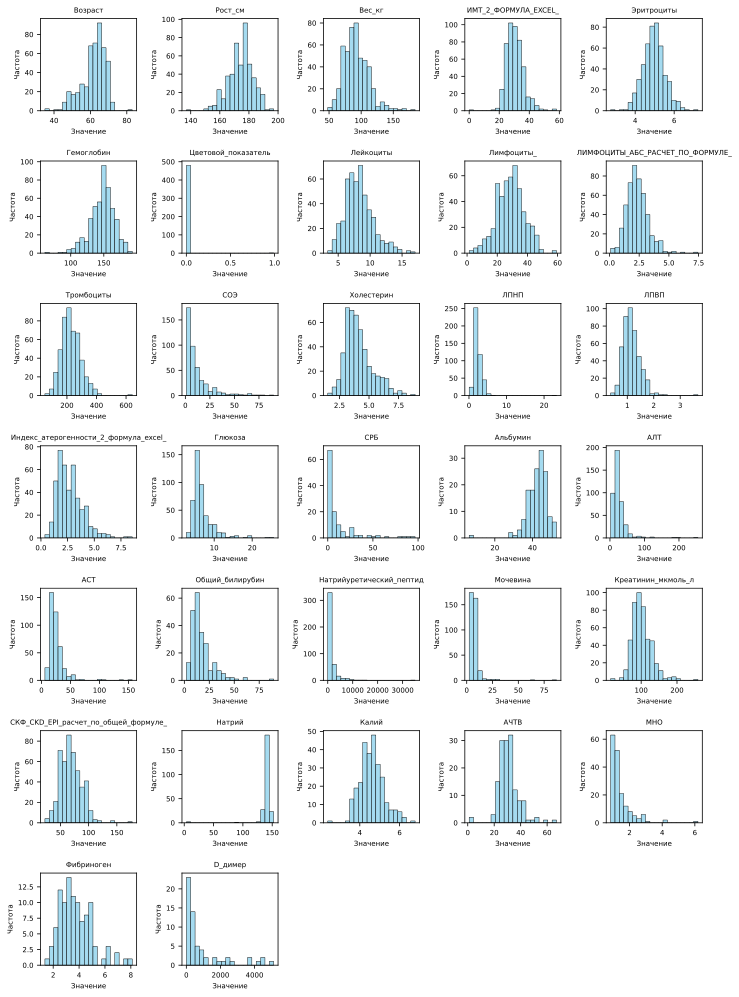


-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

Распределение количественных дискретных величин


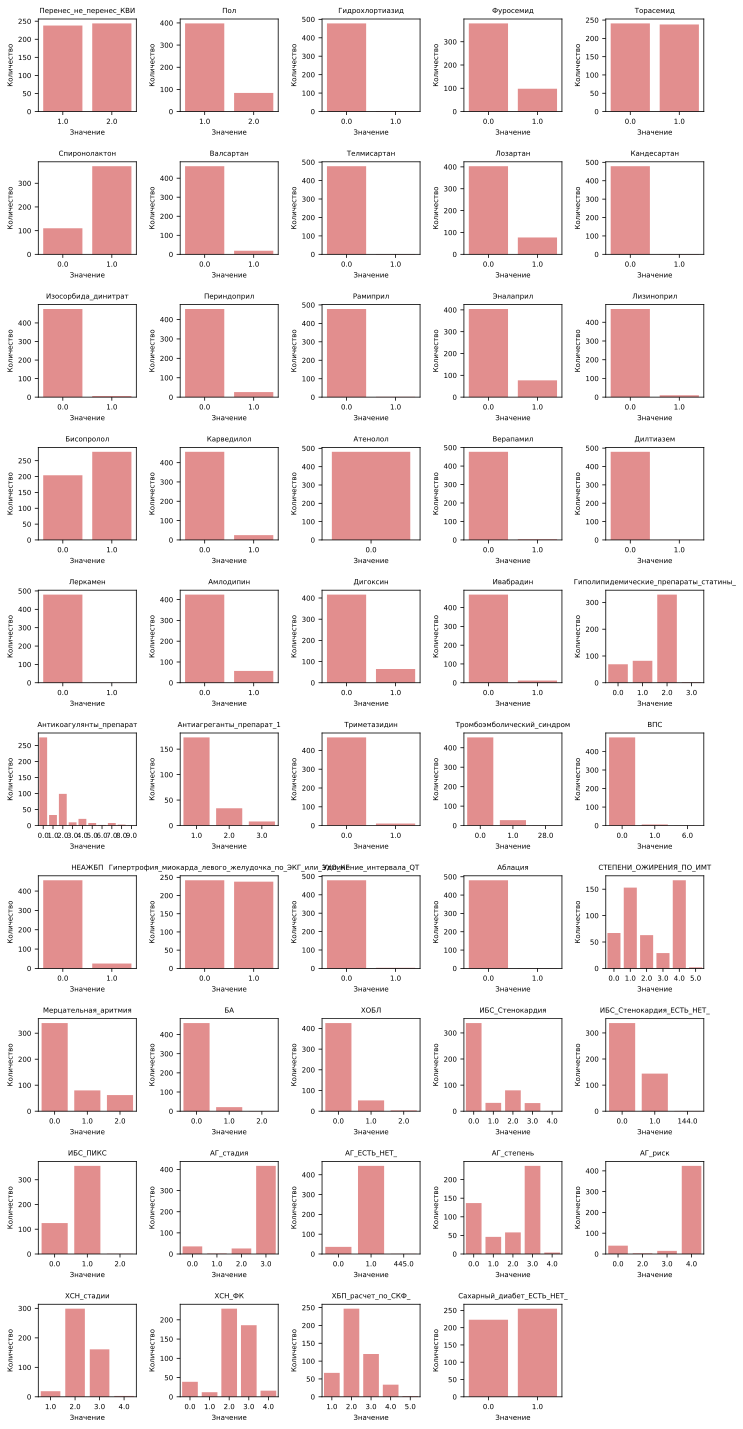


-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

Уникальные значения категориальных признаков

BPB_голеней : [0 1 4 2 3 nan '2-3']
Гипертрофия_миокарда_левого_желудочка_по_ЭКГ_или_ЭХО_КГ_комментарий_ : [nan 'умеренная гипертрофия' 'незначительная '
 'незначительная неравномерная' 'незначительная'
 'с признаками перезагрузки' 'небольшая гипертрофия' 'эксцентрическая'
 'концентрическая гипертрофия' ' незначительная '
 'с изминением его миокарда' 'задней стенки левого желудочка'
 'незначительная гипертрофия ЗС ЛЖ']
Блокада_НП_Гисса : [0 1 '1-2' 2 nan]
Блокада_НП_Гисса_комментарий_ : [nan 'полная блокада' 'переходящая блокада' 'передней левой ветви'
 'передней ветви левой ножки' 'неполная блокада ' 'неполная блокада ЛНПГ'
 'левой передней ветви ' 'неполная блокада' 'левой ножки' 'блокада ПВЛНПГ'
 'неполная блокада правой ножки' '1 и 2' 'левых ветвей'
 '1 с приемущественным блокос передней ветви' 'неполная блокада ПВЛНПГ'
 'правой ножки 

In [ ]:

review(df, num_col_names_discr=['Перенес_не_перенес_КВИ', 'Пол', 'Гидрохлортиазид', 'Фуросемид','Торасемид',
                           'Спиронолактон', 'Валсартан', 'Телмисартан', 'Лозартан', 'Кандесартан',
                           'Изосорбида_динитрат', 'Периндоприл', 'Рамиприл', 'Эналаприл', 'Лизиноприл',
                           'Бисопролол','Карведилол', 'Атенолол', 'Верапамил', 'Дилтиазем', 'Леркамен',
                           'Амлодипин', 'Дигоксин','Ивабрадин', 'Гиполипидемические_препараты_статины_',
                           'Антикоагулянты_препарат', 'Антиагреганты_препарат_1', 'Триметазидин',
                                'Тромбоэмболический_синдром','ВПС', 'НЕАЖБП',
                                'Гипертрофия_миокарда_левого_желудочка_по_ЭКГ_или_ЭХО_КГ',
                                'Удлинение_интервала_QT', 'Аблация', 'СТЕПЕНИ_ОЖИРЕНИЯ_ПО_ИМТ',
                               'Мерцательная_аритмия','БА', 'ХОБЛ', 'ИБС_Стенокардия',
                                'ИБС_Стенокардия_ЕСТЬ_НЕТ_', 'ИБС_ПИКС', 'АГ_стадия',
                           'АГ_ЕСТЬ_НЕТ_', 'АГ_степень','АГ_риск', 'ХСН_стадии',  'ХСН_ФК',
                                'ХБП_расчет_по_СКФ_', 'Сахарный_диабет_ЕСТЬ_НЕТ_'],
       num_col_names_cont=['Возраст', 'Рост_см','Вес_кг', 'ИМТ_2_ФОРМУЛА_EXCEL_', 'Эритроциты', 'Гемоглобин',
                           'Цветовой_показатель', 'Лейкоциты', 'Лимфоциты_', 'ЛИМФОЦИТЫ_АБС_РАСЧЕТ_ПО_ФОРМУЛЕ_',
                           'Тромбоциты', 'СОЭ', 'Холестерин', 'ЛПНП', 'ЛПВП',
                           'Индекс_атерогенности_2_формула_excel_', 'Глюкоза', 'СРБ', 'Альбумин', 'АЛТ',
                           'АСТ', 'Общий_билирубин','Натрийуретический_пептид', 'Мочевина',
                           'Креатинин_мкмоль_л', 'СКФ_CKD_EPI_расчет_по_общей_формуле_','Натрий', 'Калий',
                           'АЧТВ', 'МНО', 'Фибриноген', 'D_димер'])

<mark> Можно добавить графическое отображение пропусков (например, через sns.heatmap или missingno.bar) — это сделает обзор данных более наглядным и позволит быстрее оценить их полноту.

**ВЫВОД ПО РАЗДЕЛУ "ИЗУЧЕНИЕ ОБЩЕЙ ИНФОРМАЦИИ":**

Загружен датафрейм с информацией о показателях пациентов. Данные по 484 пациентам, по 106 признакам.

С целью последующей предобработки выявлено:

- сократить количество признаков, сделать начальный отбор

- исправить бинарные признаки `Перенес_не_перенес_КВИ`, `Пол`, `Тромбоэмболический_синдром`, `ВПС`, `БА`, `ХОБЛ_ЕСТЬ_НЕТ_`, `ИБС_ПИКС` привести к значениям `0` и `1`

- привести к одному виду значения в столбцах `ВРВ_голеней` (значение `2-3`), `Блокада_НП_Гисса` (значение `1-2`), `AV_блокада` (значения `2-3`, `1-2`), `ХСН_по_фракции_выброса_`

- Проверить на аномалии и выбросы столбцы `ИМТ_2_ФОРМУЛА_EXCEL_`(слишком низкое значение < 5), `Цветовой_показатель`, `Альбумин` (значение меньше 10), `Натрийуретический_пептид`, `Натрий` (<120)

- избавиться от дублирующих признаков

Целевой признак представлен 2 категориями: 0 (нет диабета) и 1 (есть диабет). Относительно сбалансирован.

## Начальный отбор признаков

In [ ]:
# посмотрим на пропуски еще раз

df.isna().sum().sort_values(ascending=False).head(40)

Прокальцитонин                                                          482
Лактат                                                                  474
Антикоагулянты_препарат_2                                               472
Антиагреганты_препарат_2                                                467
Гипертрофия_миокарда_левого_желудочка_по_ЭКГ_или_ЭХО_КГ_комментарий_    458
Ферритин                                                                454
ЛДГ                                                                     443
Блокада_НП_Гисса_комментарий_                                           443
D_димер                                                                 423
Фибриноген                                                              381
СРБ                                                                     359
АЧТВ                                                                    338
Альбумин                                                                336
МНО         

Признаки `Гликированный_гемоглобин`, `Метформин`, `Дапаглифлозин` являются прямыми маркерами заболевания диабета, поэтому в модель лучше их сразу не брать.

Признаки `Прокальцитонин`, `Лактат`, `Антикоагулянты_препарат_2`, `Антиагреганты_препарат_2`, `Ферритин`, `ЛДГ`, `Гипертрофия_миокарда_левого_желудочка_по_ЭКГ_или_ЭХО_КГ_комментарий_`, `Блокада_НП_Гисса_комментарий_`  имеют почти 100% пропусков, их тоже не берем в модель.

`Цветовой показатель` имеет только одно значени 0,99, один пропуск и остальные нули, в модель не берем.

Признак `Гидрохлортиазид`, `Телмисартан`, `Кандесартан`, `Рамиприл`, `Атенолол`, `Дилтиазем`, `Леркамен` неинформативны, можно в модель не брать, почти 100% значений "0"

Противовирусные `Фавипиравир`, `Молнупиравир` не берем в модель: на наличие диабета не указывают.

Среди признаков `ИМТ_2_ФОРМУЛА_EXCEL_`, `ОЖИРЕНИЕ_ЕСТЬ_НЕТ_` оставим только один, потому как они все напрямую связаны друг с другом.

`BPB_голеней`, `BPB_голеней_ЕСТЬ_НЕТ_` - дублирующиеся признаки. Оставим один.

`БА`, `БА_ЕСТЬ_НЕТ_`, `ХОБЛ`, `ХОБЛ_ЕСТЬ_НЕТ_`, `ИБС_ПИКС`, `ИБС_ПИКС_ЕСТЬ_НЕТ_`, `АГ_ЕСТЬ_НЕТ_` - то же самое

Хроническая болезнь почек классифицируется по СКФ и альбуминурии. Этих признаков несколько, оставим только `ХБП_расчет_по_СКФ_`

Признаки `Аблация` и `АКШ` не информативны для модели, поскольку являются следствием тяжелого течения аритмии и ишемической болезни сердца, которые потребовали проведения операций, поэтому в модель их брать не будем для уменьшения шума.

<mark> Признаки, связанные с приёмом лекарств (Метформин, Дапаглифлозин), действительно логично исключить из модели, так как они напрямую назначаются при сахарном диабете. А вот показатель Гликированный_гемоглобин стоило бы проверить на зависимость от таргета и отдельно обсудить — его исключение без анализа может выглядеть спорным.

In [ ]:
# первый отбор признаков

columns_needed = ['Перенес_не_перенес_КВИ', 'Возраст', 'Пол', 'Рост_см', 'Вес_кг', 'ИМТ_2_ФОРМУЛА_EXCEL_',
         'Эритроциты', 'Гемоглобин', 'Лейкоциты', 'Лимфоциты_',
         'ЛИМФОЦИТЫ_АБС_РАСЧЕТ_ПО_ФОРМУЛЕ_', 'Тромбоциты', 'СОЭ', 'Холестерин', 'ЛПНП', 'ЛПВП',
         'Индекс_атерогенности_2_формула_excel_', 'Глюкоза', 'СРБ', 'Альбумин', 'АЛТ', 'АСТ', 'Общий_билирубин',
         'Натрийуретический_пептид', 'Мочевина', 'Креатинин_мкмоль_л', 'СКФ_CKD_EPI_расчет_по_общей_формуле_',
         'Натрий', 'Калий', 'АЧТВ', 'МНО', 'Фибриноген', 'D_димер', 'Фуросемид',
        'Торасемид', 'Спиронолактон', 'Валсартан', 'Лозартан',
         'Изосорбида_динитрат', 'Периндоприл', 'Эналаприл', 'Лизиноприл', 'Бисопролол',
        'Карведилол', 'Верапамил', 'Амлодипин', 'Дигоксин',
        'Ивабрадин', 'Гиполипидемические_препараты_статины_', 'Антикоагулянты_препарат',
         'Антиагреганты_препарат_1', 'Триметазидин', 'BPB_голеней', 'Тромбоэмболический_синдром',
         'ВПС', 'НЕАЖБП', 'Гипертрофия_миокарда_левого_желудочка_по_ЭКГ_или_ЭХО_КГ', 'Блокада_НП_Гисса',
        'Удлинение_интервала_QT', 'AV_блокада', 'ХБП_расчет_по_СКФ_', 'Мерцательная_аритмия',
         'БА', 'ХОБЛ_ЕСТЬ_НЕТ_', 'ИБС_Стенокардия','ИБС_Стенокардия_ЕСТЬ_НЕТ_', 'ИБС_ПИКС', 'АГ_стадия', 'АГ_степень',
         'СТЕПЕНИ_ОЖИРЕНИЯ_ПО_ИМТ',
         'АГ_риск', 'ХСН_стадии', 'ХСН_ФК', 'ХСН_по_фракции_выброса_', 'Сахарный_диабет_ЕСТЬ_НЕТ_']

df_1 = df[columns_needed].copy()

In [ ]:
df_1.head()

Перенес_не_перенес_КВИ  Возраст   Пол  Рост_см  Вес_кг  \
0                   1.000   68.000 2.000  158.000  86.000   
1                   1.000   54.000 1.000  180.000 119.000   
2                   1.000   68.000 1.000  174.000 110.000   
3                   1.000   67.000 1.000  189.000 110.000   
4                   1.000   60.000 1.000  178.000 115.000   

   ИМТ_2_ФОРМУЛА_EXCEL_  Эритроциты  Гемоглобин  Лейкоциты  Лимфоциты_  \
0                34.450       5.330     163.000      9.610      31.900   
1                36.728       5.010     130.000     10.480      19.000   
2                36.332         NaN     161.000      5.400      25.600   
3                30.794       4.470     134.000      8.500      13.300   
4                36.296       5.440     166.000      9.060      28.300   

   ЛИМФОЦИТЫ_АБС_РАСЧЕТ_ПО_ФОРМУЛЕ_  Тромбоциты    СОЭ  Холестерин  ЛПНП  \
0                             3.066     201.000  8.000       4.140 2.250   
1                             1.991     288.000  5.000       3.430 1.310   
2                             1.382     114.000 10.000       4.230 2.690   
3                             1.131     175.000  5.000         NaN   NaN   
4                             2.564     226.000  5.000       3.250 1.450   

   ЛПВП  Индекс_атерогенности_2_формула_excel_  Глюкоза    СРБ  Альбумин  \
0 0.970                                  3.268    5.770  0.190       NaN   
1 1.190                                  1.882    5.910    NaN    46.000   
2 0.940                                  3.500    6.610    NaN       NaN   
3   NaN                                    NaN    4.980 20.350    43.600   
4 1.300                                  1.500    9.480    NaN       NaN   

     АЛТ    АСТ  Общий_билирубин  Натрийуретический_пептид  Мочевина  \
0 24.000 21.000              NaN                   197.700       NaN   
1 12.000 14.000              NaN                 2,358.000    10.100   
2 16.500 20.700           18.100                       NaN       NaN   
3 17.900 23.800           23.300                   454.600    10.780   
4    NaN    NaN              NaN                   280.700     3.200   

   Креатинин_мкмоль_л  СКФ_CKD_EPI_расчет_по_общей_формуле_  Натрий  Калий  \
0              79.800                                65.460     NaN  5.760   
1             107.280                                67.224 140.400  4.380   
2             106.200                                61.677 140.600  4.300   
3              91.200                                74.666 140.600  4.000   
4              81.700                                89.585     NaN    NaN   

    АЧТВ   МНО  Фибриноген  D_димер  Фуросемид  Торасемид  Спиронолактон  \
0    NaN   NaN         NaN      NaN      0.000      1.000          1.000   
1 38.200 2.340       3.710      NaN      0.000      1.000          0.000   
2 33.700   NaN         NaN      NaN      1.000      0.000          0.000   
3 26.300 1.090       3.680      NaN      0.000      1.000          1.000   
4    NaN   NaN         NaN      NaN      0.000      1.000          1.000   

   Валсартан  Лозартан  Изосорбида_динитрат  Периндоприл  Эналаприл  \
0      0.000     0.000                0.000        0.000      0.000   
1      0.000     1.000                0.000        0.000      0.000   
2      0.000     1.000                1.000        0.000      0.000   
3      0.000     0.000                0.000        0.000      0.000   
4      0.000     0.000                0.000        0.000      0.000   

   Лизиноприл  Бисопролол  Карведилол  Верапамил  Амлодипин  Дигоксин  \
0       0.000       1.000       0.000      0.000      0.000     0.000   
1       0.000       1.000       0.000      0.000      0.000     1.000   
2       0.000       1.000       0.000      0.000      0.000     0.000   
3       0.000       0.000       0.000      0.000      0.000     0.000   
4       0.000       0.000       0.000      0.000      0.000     0.000   

   Ивабрадин  Гиполипидемические_препараты_статины_ 

В целевой переменной 6 пропусков, эти строки лучше удалить

In [ ]:
# пропуски целевой переменной

df_1 = df_1[df_1["Сахарный_диабет_ЕСТЬ_НЕТ_"].notna()].reset_index(drop=True)


In [ ]:
df_1['Сахарный_диабет_ЕСТЬ_НЕТ_'].isna().sum()

0

## Предобработка данных

### Бинарные признаки

In [ ]:
# Тромбоэмболический синдром

df_1['Тромбоэмболический_синдром'].value_counts(dropna=False)

Тромбоэмболический_синдром
0.000    449
1.000     28
NaN        1
Name: count, dtype: int64

Найдена аномалия, значение 28, заменим его на 1 по логике, скорее всего болезнь есть, и было проставлено значение анализа

<mark> Стоит пояснить источник аномального значения 28 и почему оно заменяется на 1; полезно выводить строки с подозрительными или аномальными значениями, чтобы проверка была более понятной.

In [ ]:
df_1['Тромбоэмболический_синдром'] = df_1['Тромбоэмболический_синдром'].replace({28:1})

In [ ]:
# Проверим

df_1['Тромбоэмболический_синдром'].value_counts(dropna=False)

Тромбоэмболический_синдром
0.000    449
1.000     28
NaN        1
Name: count, dtype: int64

<mark> по данным видно, что ничего не изменилось...

In [ ]:
# Врожденный порок сердца

df_1['ВПС'].value_counts(dropna=False)

ВПС
0.000    472
1.000      6
Name: count, dtype: int64

Найдена аномалия, значение 6, заменим его на 1

<mark> **❌ НУЖНО ИСПРАВИТЬ.** Аналогичная ситуация встречается и в других признаках. Просим исправить замены в следующих признаках: 'Тромбоэмболический_синдром', 'ВПС', 'ХОБЛ_ЕСТЬ_НЕТ_', 'ИБС_ПИКС'.

In [ ]:
df_1['ВПС'] = df_1['ВПС'].replace({6:1})

In [ ]:
# Проверка

df_1['ВПС'].value_counts(dropna=False)

ВПС
0.000    472
1.000      6
Name: count, dtype: int64

In [ ]:
# Бронхиальная астма

df_1['БА'].value_counts(dropna=False)

БА
0.000    456
1.000     21
2.000      1
Name: count, dtype: int64

Неверно заполненное значение 2, заменим его на 1

In [ ]:
df_1['БА'] = df_1['БА'].replace({2:1})

In [ ]:
# Проверка

df_1['БА'].value_counts(dropna=False)

БА
0.000    456
1.000     22
Name: count, dtype: int64

In [ ]:
# Хроническая обструктивная болезнь легких

df_1['ХОБЛ_ЕСТЬ_НЕТ_'].value_counts(dropna=False)

ХОБЛ_ЕСТЬ_НЕТ_
0.000    422
1.000     56
Name: count, dtype: int64

Неверно заполненное значение 56, заменим его на 1

In [ ]:
df_1['ХОБЛ_ЕСТЬ_НЕТ_'] = df_1['ХОБЛ_ЕСТЬ_НЕТ_'].replace({56:1})

In [ ]:
# Проверка

df_1['ХОБЛ_ЕСТЬ_НЕТ_'].value_counts(dropna=False)

ХОБЛ_ЕСТЬ_НЕТ_
0.000    422
1.000     56
Name: count, dtype: int64

In [ ]:
# Ишемическая болезнь сердца. Постинфарктный кардиосклероз.

df_1['ИБС_ПИКС'].value_counts(dropna=False)

ИБС_ПИКС
1.000    353
0.000    125
Name: count, dtype: int64

Неверно заполненное значение 2, заменим его на 1

In [ ]:
df_1['ИБС_ПИКС'] = df_1['ИБС_ПИКС'].replace({2:1})

In [ ]:
# Проверка

df_1['ИБС_ПИКС'].value_counts(dropna=False)

ИБС_ПИКС
1.000    353
0.000    125
Name: count, dtype: int64

In [ ]:
# заменим в бинарных признаках "2" на "1", а "1" на "0"

for col in ['Перенес_не_перенес_КВИ', 'Пол']:
    df_1[col] = df_1[col].replace({1:0, 2:1})

### Исправление строковых значений признаков

ВРВ_голеней, Блокада_НП_Гисса, AV_блокада, ХСН_по_фракции_выброса_

In [ ]:
# Варикозная болезнь голеней

df_1['BPB_голеней'].value_counts(dropna=False)

BPB_голеней
0      386
1       75
2        7
3        5
4        2
2-3      2
NaN      1
Name: count, dtype: int64

В клинической практике и статистике чаще берут более тяжёлую стадию, лучше переоценить риск, чем недооценить), поэтому заменять пограничные значения будем на бОльшие

In [ ]:
# заменим "2-3" на "3"

df_1['BPB_голеней'] = df_1['BPB_голеней'].replace({'2-3':3})

In [ ]:
# Блокада_НП_Гисса

df_1['Блокада_НП_Гисса'].value_counts(dropna=False)

Блокада_НП_Гисса
0      309
1      141
2       19
1-2      9
Name: count, dtype: int64

In [ ]:
# заменим "1-2" на "2"

df_1['Блокада_НП_Гисса'] = df_1['Блокада_НП_Гисса'].replace({'1-2':2})

In [ ]:
# AV_блокада

df_1['AV_блокада'].value_counts(dropna=False)

AV_блокада
0         407
1          59
2           4
2-3         3
3           2
полная      2
1-2         1
Name: count, dtype: int64

In [ ]:
# заменим "1-2" на "2", "2-3" на "3", "полная" на "3"

df_1['AV_блокада'] = df_1['AV_блокада'].replace({'1-2':2, '2-3':3, 'полная':3})

In [ ]:
# ХСН_по_фракции_выброса_

df_1['ХСН_по_фракции_выброса_'].value_counts(dropna=False)

ХСН_по_фракции_выброса_
0        98
40       40
38       34
35       20
37       17
         ..
42-43     1
с2        1
28.9      1
43.4      1
57        1
Name: count, Length: 74, dtype: int64

In [ ]:
# используем функцию

def parse_ef_take_upper(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip().lower()
    s = s.replace(',', '.')
    s = re.sub(r'\s*-\s*', '-', s)

    # диапазон: "24-25" → 25
    m = re.match(r'^(\d+(?:\.\d+)?)-(\d+(?:\.\d+)?)$', s)
    if m:
        a, b = float(m.group(1)), float(m.group(2))
        return round(max(a, b))

    # одиночное число: "25.9" → 26
    m = re.match(r'^\d+(?:\.\d+)?$', s)
    if m:
        return round(float(s))

    # всё остальное ("с2" и пр.) → NaN
    return np.nan

# применяем к колонке
df_1["ХСН_по_фракции_выброса_" + "clean"] = df_1["ХСН_по_фракции_выброса_"].apply(parse_ef_take_upper)

<mark> Все функции у вас собраны в одном месте, поэтому логично вынести и эту функцию туда, чтобы сохранить единый стиль организации кода. Аналогично стоит поступить и с другими функциями, которые пока находятся прямо в ячейках ноутбука.

In [ ]:
df_1['ХСН_по_фракции_выброса_clean'].unique()

array([ 0., 35., 40., 42., 34., 31., 33., 23., 29., 41., 38., 25., 30.,
       27., 32., 36., 50., 45., 37., 26., 28., 39., 58., 51., 59., 46.,
       48., 43., 49., 20., 18., 24., 47., 22., 61., 21., 66., nan, 44.,
       17., 52., 56., 57.])

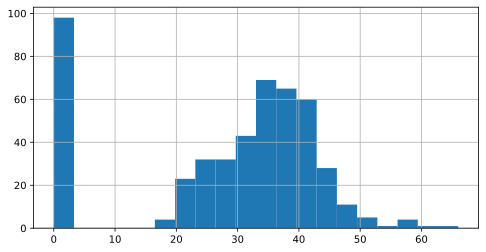

In [ ]:
df_1['ХСН_по_фракции_выброса_clean'].hist(bins=20);

Есть большое количество значений "0", но таких значений не может быть с медицинской точки зрения, потому что этот признак показывает долю (%) крови, которую левый желудочек выбрасывает при сокращении. Соответственно лучше заменить 0 на nan

In [ ]:
df_1.loc[df_1['ХСН_по_фракции_выброса_clean'] == 0, 'ХСН_по_фракции_выброса_clean'] = np.nan

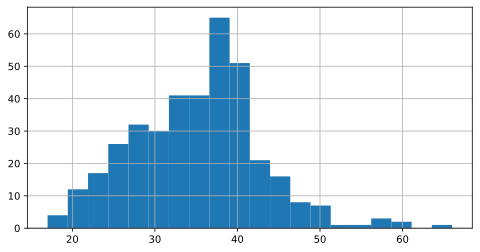

In [ ]:
df_1['ХСН_по_фракции_выброса_clean'].hist(bins=20);

### Аномалии и выбросы

С точки зрения медицины отметим допустимые значения признаков - медицинских показателей.

|  Признак  |  Описание  |  Принимаемые значения  | тип данных | Значения данного признака у человека в норме  |
|:---------:|:----------:|:----------------------:|:--------------------------:|:----------------------------------------------:|
| Возраст | Возраст на момент сдачи анализа | непрерывный признак | 35..83  | - |
| Пол | Пол человека сдававшего анализ| категориальный признак | 0 - мужчина, <br> 1 - женщина  | - |
| Рост | Рост человека сдававшего анализ| непрерывный признак | 137..197  | - |
| Вес | Вес человека (в кг) сдававшего анализ| непрерывный признак | 48..184  | - |
| ИМТ_2_(формула_excel) | индекс массы тела | непрерывный признак | 0..58  | 18.5..25 |
| Эритроциты | красные кровяные тельца | непрерывный признак | 2.74..7.22  | 3.8..5.7 |
| Гемоглобин | сложный железосодержащий белок, содержащийся в эритроцитах | непрерывный признак | 61..193  | 120..160 |
| Цветовой показатель | расчетный параметр в общем анализе крови, который отражает среднее содержание гемоглобина в одном эритроците и показывает, насколько эритроциты насыщены гемоглобином по сравнению с нормой. | признак представлен практически одним константным значением | 0, 0.99  | 0.85..1.05 |
| Лейкоциты | ключевые клетки иммунной системы | непрерывный признак | 3.37..17  | 4.0..9.0 |
| Лимфоциты | клетки приобретенного (специфического) иммунитета | непрерывный признак | 1.4..59.3% | 19..37% |
| Лимфоциты_абс | клетки приобретенного (специфического) иммунитета | непрерывный признак | 0.097..7.445 | 1..4.8 |
| Тромбоциты | это мелкие, безъядерные клетки крови, главная функция которых — остановка кровотечения (гемостаз) и участие в заживлении повреждений. | непрерывный признак | 51..642 | 180..360 |
| СОЭ | Скорость Оседания Эритроцитов | непрерывный признак | 1..90 | < 15 |
| Холестерин | - | непрерывный признак | 1.5..8.9 | < 5.2 |
| ЛПНП | Липопротеины низкой плотности  | непрерывный признак | 0.06..23.32 | 1.95..4.8 |
| ЛПВП | Липопротеины высокой плотности  | непрерывный признак | 0.37..3.67 | 0.7..2.28 |
| Индекс_атерогенности_2 | Индекс атерогенности отражает нарушение холестеринового обмена  | непрерывный признак | 0.37..8.56 | 2.2..3.5 |
| Глюкоза | -  | непрерывный признак | 2.67..25.66 | < 5.6 |
| Гликированный гемоглобин | биохимический показатель крови, который отражает средний уровень сахара (глюкозы) в крови за последние 2-3 месяца. <br>(явный индикатор диабета) | непрерывный признак | 4.3..16.1 | < 5.7 |
| СРБ | С-реактивный белок | непрерывный признак | 0..96.73 | < 5 |
| Ферритин |  белок, отвечающий за хранение железа в организме | непрерывный признак | 0.14..430 | 10..250 |
| Прокальцитонин | белок-предшественник гормона кальцитонина, который в норме вырабатывается в щитовидной железе и участвует в обмене кальция | непрерывный признак | 0..0.37 | < 0.05 |
| Альбумин | белок сыворотки крови, | непрерывный признак | 6.38..52.8 | 35..50 |
| Лактат | продукт анаэробного метаболизма глюкозы | непрерывный признак | 1.2..225.9 | 0.5..2.2 |
| ЛДГ | лактатдегидрогеназа | непрерывный признак | 74.3..789 | 135..225 |
| АЛТ | аланинаминотрансфераза | непрерывный признак | 1.93..255 | < 41 |
| АСТ | аспартатаминотрансфераза | непрерывный признак | 6..156.5 | < 41 |
| Общий билирубин | пигмент, образующийся при распаде гема | непрерывный признак | 2..89.5 | 3.4..20.5 |
| Натрийуретический пептид | группа гормоноподобных веществ, которые регулируют водно-солевой баланс и работу сердца | непрерывный признак | 10..3500 | < 100 |
| Мочевина | конечный продукт обмена белков | непрерывный признак | 2.4..87 | 2.5..8.3 |
| Креатинин | - | непрерывный признак | 14.7..258.5 | 53..115 |
| Натрий | - | непрерывный признак | 3.6..152.5 | 135..145 |
| Калий | - | непрерывный признак | 2.39..6.78 | 3.5..5.1 |
| АЧТВ | активированное частичное тромбопластиновое время | непрерывный признак | 1.1..67.1 | 25..35 |
| МНО | международное нормализованное отношение | непрерывный признак | 0.84..6.19 | 0.8..1.2 |
| Фибриноген | белок плазмы крови, синтезируемый печенью | непрерывный признак | 1.36..8.11 | 2..4 |
| D-димер | - | непрерывный признак | 0.1..5123 | < 500 нг/мл |
| Фавипиравир | противовирусный препарат | категориальный признак | 0 - не принимался <br> 1 - принимался | - |
| Молнупиравир | противовирусный препарат против COVID-19 | категориальный признак | 0 - не принимался <br> 1 - принимался | - |
| Гидрохлортиазид | диуретик группы тиазидов | категориальный признак | 0 - не принимался <br> 1 - принимался | - |
| Фуросемид | мощный петлевой диуретик | категориальный признак | 0 - не принимался <br> 1 - принимался | - |
| Торасемид | петлевой диуретик, подобный Фуросемиду | категориальный признак | 0 - не принимался <br> 1 - принимался | - |
| Спиронолактон | калийсберегающий диуретик | категориальный признак | 0 - не принимался <br> 1 - принимался | - |
| Телмисартан | препарат группы антагонистов рецепторов ангиотензина II (для снижения артериального давления) | категориальный признак | 0 - не принимался <br> 1 - принимался | - |
| Лозартан | препарат группы антагонистов рецепторов ангиотензина II | категориальный признак | 0 - не принимался <br> 1 - принимался | - |
| Кандесартан | препарат группы антагонистов рецепторов ангиотензина II | категориальный признак | 0 - не принимался <br> 1 - принимался | - |
| Изосорбида динитрат | препарат из группы нитратов, расширяющий сосуды | категориальный признак | 0 - не принимался <br> 1 - принимался | - |
| Периндоприл | препарат из группы ингибиторов ангиотензинпревращающего фермента (для снижения артериального давления) | категориальный признак | 0 - не принимался <br> 1 - принимался | - |
| Рамиприл | препарат из группы ингибиторов ангиотензинпревращающего фермента | категориальный признак | 0 - не принимался <br> 1 - принимался | - |
| Эналаприл | препарат из группы ингибиторов ангиотензинпревращающего фермента | категориальный признак | 0 - не принимался <br> 1 - принимался | - |
| Лизиноприл | препарат из группы ингибиторов ангиотензинпревращающего фермента | категориальный признак | 0 - не принимался <br> 1 - принимался | - |
| Бисопролол | препарат из группы β1-адреноблокаторов (кардиоселективные бета-блокаторы) | категориальный признак | 0 - не принимался <br> 1 - принимался | - |
| Карведилол | препарат из группы β1-адреноблокаторов с α1-адреноблокирующим действием | категориальный признак | 0 - не принимался <br> 1 - принимался | - |
| Атенолол | препарат из группы β1-адреноблокаторов| категориальный признак | 0 - не принимался <br> 1 - принимался | - |
| Верапамил | препарат из группы блокаторов кальциевых каналов|категориальный признак | 0 - не принимался <br> 1 - принимался | - |
| Дилтиазем | препарат из группы блокаторов кальциевых каналов|категориальный признак | 0 - не принимался <br> 1 - принимался | - |
| Леркамен | антигипертензивный препарат|категориальный признак | 0 - не принимался <br> 1 - принимался | - |
| Амлодипин | препарат из группы блокаторов кальциевых каналов |категориальный признак | 0 - не принимался <br> 1 - принимался | - |
| Дигоксин | препарат из группы сердечных гликозидов (для сердечной недостаточности) |категориальный признак | 0 - не принимался <br> 1 - принимался | - |
| Ивабрадин | препарат, снижающий частоту сердечных сокращений (ЧСС) |категориальный признак | 0 - не принимался <br> 1 - принимался | - |
| Гиполипидемические препараты (статины) | препарат, снижают «плохой» холестерин |категориальный признак | 0, 1, 2, 3| - |
| Антикоагулянты | препараты, снижающие способность крови к свертыванию | категориальный признак | 0 - не принимался <br> 1 - эноксапарин, эниксум; <br> 2 - ривароксабан, ксарелто; <br> 3 - дабигатран, прадакса; <br> 4 - апиксабан, эликвис; <br> 5 - варфарин;  <br> 6 - делтепорин; <br> 7 - гепарин; <br> 8 - надропарин кальция, фраксипарин; <br> 9 - парнапарин натрия| - |
| Антиагреганты | препараты, которые снижают способность тромбоцитов к агрегации, то есть слипанию и образованию тромбов | категориальный признак | 1 - ацетилсалициловая к-та; <br> 2 - клопидогрел, плавикс; <br> 3 - тикагрелор; | - |
| Триметазидин | препарат с кардиопротекторным действием, относящийся к группе метаболических средств (для лечения стенокардии) |категориальный признак | 0 - не принимался <br> 1 - принимался | - |
| Метформин | препарат снижение уровня глюкозы в крови при сахарном диабете (утечка) |категориальный признак | 0 - не принимался <br> 1 - принимался | - |
| Дапаглифлозин | препарат снижение уровня глюкозы в крови при сахарном диабете (утечка) |категориальный признак | 0 - не принимался <br> 1 - принимался | - |
| СТЕПЕНИ_ОЖИРЕНИЯ_ПО_ИМТ | классификация ИМТ |категориальный признак | 0 - нормальная масса тела; <br> 1 - 1 степень; <br> 2 - 2 степень; <br> 3 - 3 степень; <br> 4 - избыточная масса тела (предожирение);<br> 5 - дефицит массы тела | - |
| ОЖИРЕНИЕ_ЕСТЬ_НЕТ_ | - |категориальный признак | 0 - есть проблемы с весом <br> 1 - нет проблем | - |
| ВРВ голеней | - | категориальный признак |  [0 1 4 2 3 nan '2-3'] | - |
| Тромбоэмболический_синдром | состояние, при котором в организме нарушен баланс между свертывающей и противосвертывающей системами крови | категориальный признак | 0 - нет <br> 1 - есть | - |
| ВПС | Врожденные пороки сердца | категориальный признак | 0 - нет <br> 1 - есть | - |
| НЕАЖБП | Неалкогольная жировая болезнь печени | категориальный признак | 0 - нет <br> 1 - есть | - |
| Гипертрофия_миокарда_левого_желудочка_по_ЭКГ_или_ЭХО_КГ | - | категориальный признак | 0 - нет <br> 1 - есть | - |
| Удлинение_интервала_QT | отражает нарушение процесса реполяризации (расслабления) желудочков сердца | категориальный признак | 0 - нет <br> 1 - есть | - |
| ХБП_расчет_по_СКФ_ | Хроническая болезнь почек: расчет по СКФ (скорость клубочковой фильтрации) | категориальный признак | [1, 2, 3, 4, 5] | - |
| ХБП_ЕСТЬ_НЕТ_ | - | категориальный признак | 0 - ? <br> 1 - ? | - |
| Мерцательная_аритмия | нарушение сердечного ритма | категориальный признак | [0, 1, 2] | - |
| Мерцательная_аритмия_ЕСТЬ_НЕТ_ | - | категориальный признак | 0 - нет <br> 1 - есть | - |
| Аблация | современная малоинвазивная процедура, которая используется для лечения нарушений сердечного ритма | категориальный признак | 0 - нет <br> 1 - есть | - |
| АКШ | Аортокоронарное шунтирование (АКШ) — это обширная хирургическая операция на открытом сердце | категориальный признак | 0 - нет <br> 1 - есть | - |
| БА | Бронхиальная астма | категориальный признак | [0, 1, 2] | - |
| БА_ЕСТЬ_НЕТ_ | Бронхиальная астма | категориальный признак | 0 - нет <br> 1 - есть | - |
| ХОБЛ | Хроническая обструктивная болезнь легких | категориальный признак | [0, 1, 2] | - |
| ХОБЛ_ЕСТЬ_НЕТ_ | Хроническая обструктивная болезнь легких | категориальный признак | 0 - нет <br> 1 - есть | - |
| ИБС_Стенокардия| заболевание | категориальный признак | [0, 1, 2, 3, 4] | - |
| ИБС_Стенокардия_ЕСТЬ_НЕТ_| заболевание | категориальный признак | 0 - нет <br> 1 - есть | - |
| ИБС_ПИКС | Постинфарктный кардиосклероз | категориальный признак | [0, 1, 2] | - |
| ИБС_ПИКС_ЕСТЬ_НЕТ_| Постинфарктный кардиосклероз | категориальный признак | 0 - нет <br> 1 - есть | - |
| АГ_стадия | Артериальная гипертензия | категориальный признак | [0, 1, 2, 3] | - |
| АГ_стадия_ЕСТЬ_НЕТ_| Артериальная гипертензия | категориальный признак | 0 - нет <br> 1 - есть | - |
| АГ_степень | Артериальная гипертензия | категориальный признак | [0, 1, 2, 3, 4] | - |
| АГ_риск | Артериальная гипертензия | категориальный признак | 0 - норма; <br> 2 - умеренный; <br> 3 - высокий; <br> 4 - оочень высокий | - |
| ХСН_стадии | Хроническая сердечная недостаточность | категориальный признак | [1, 2, 3, 4] | - |
| ХСН_ФК | Хроническая сердечная недостаточность функциональные классы | категориальный признак | [0, 1, 2, 3, 4] | - |

Обработаем аномалии

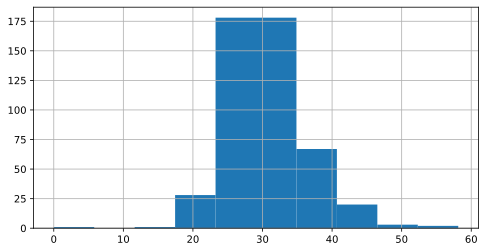

In [ ]:
# Индекс массы тела

df_1['ИМТ_2_ФОРМУЛА_EXCEL_'].hist();

Индекс массы тела ниже 15 - это критичное состояние, посмотрим не ошибка ли это

In [ ]:
df_1.query('ИМТ_2_ФОРМУЛА_EXCEL_ < 15')

Перенес_не_перенес_КВИ  Возраст   Пол  Рост_см  Вес_кг  \
394                   1.000   56.000 0.000      NaN     NaN   

     ИМТ_2_ФОРМУЛА_EXCEL_  Эритроциты  Гемоглобин  Лейкоциты  Лимфоциты_  \
394                 0.000       5.200     139.000      4.900      34.600   

     ЛИМФОЦИТЫ_АБС_РАСЧЕТ_ПО_ФОРМУЛЕ_  Тромбоциты   СОЭ  Холестерин  ЛПНП  \
394                             1.695     200.000 3.000       4.360 2.530   

     ЛПВП  Индекс_атерогенности_2_формула_excel_  Глюкоза  СРБ  Альбумин  \
394 1.460                                  1.986    4.500  NaN       NaN   

       АЛТ    АСТ  Общий_билирубин  Натрийуретический_пептид  Мочевина  \
394 87.600 54.200            9.900                 3,670.000     6.400   

     Креатинин_мкмоль_л  СКФ_CKD_EPI_расчет_по_общей_формуле_  Натрий  Калий  \
394              91.400                                80.451 147.300  4.800   

      АЧТВ   МНО  Фибриноген  D_димер  Фуросемид  Торасемид  Спиронолактон  \
394 27.700 1.030       2.530      NaN      0.000      0.000          1.000   

     Валсартан  Лозартан  Изосорбида_динитрат  Периндоприл  Эналаприл  \
394      0.000     0.000                0.000        0.000      0.000   

     Лизиноприл  Бисопролол  Карведилол  Верапамил  Амлодипин  Дигоксин  \
394       0.000       0.000       0.000      0.000      0.000     0.000   

     Ивабрадин  Гиполипидемические_препараты_статины_  \
394      0.000                                  0.000   

     Антикоагулянты_препарат  Антиагреганты_препарат_1  Триметазидин  \
394                    0.000                       NaN         0.000   

     BPB_голеней  Тромбоэмболический_синдром   ВПС  НЕАЖБП  \
394        1.000                       0.000 0.000   0.000   

     Гипертрофия_миокарда_левого_желудочка_по_ЭКГ_или_ЭХО_КГ  \
394                                              0.000         

     Блокада_НП_Гисса  Удлинение_интервала_QT  AV_блокада  ХБП_расчет_по_СКФ_  \
394                 0                   0.000           0               2.000   

     Мерцательная_аритмия    БА  ХОБЛ_ЕСТЬ_НЕТ_  ИБС_Стенокардия  \
394                 0.000 0.000           0.000            0.000   

     ИБС_Стенокардия_ЕСТЬ_НЕТ_  ИБС_ПИКС  АГ_стадия  АГ_степень  \
394                      0.000     1.000      3.000       0.000   

     СТЕПЕНИ_ОЖИРЕНИЯ_ПО_ИМТ  АГ_риск  ХСН_стадии  ХСН_ФК  \
394                      NaN    4.000       2.000   2.000   

    ХСН_по_фракции_выброса_  Сахарный_диабет_ЕСТЬ_НЕТ_  \
394                      30                      0.000   

     ХСН_по_фракции_выброса_clean  
394                        30.000

In [ ]:
df_1.loc[df_1['ИМТ_2_ФОРМУЛА_EXCEL_'] == 0, 'ИМТ_2_ФОРМУЛА_EXCEL_'] = np.nan

Это значение лучше заменить на Nan, впоследствии в пайплайне применить SimpleImputer и заменить медианой

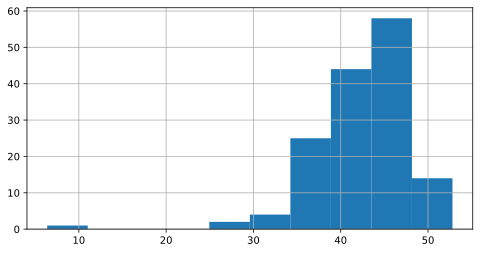

In [ ]:
# Альбумин

df_1['Альбумин'].hist();

In [ ]:
df_1.query('Альбумин < 25')

Перенес_не_перенес_КВИ  Возраст   Пол  Рост_см  Вес_кг  \
259                   1.000   70.000 0.000  194.000 141.000   

     ИМТ_2_ФОРМУЛА_EXCEL_  Эритроциты  Гемоглобин  Лейкоциты  Лимфоциты_  \
259                37.464       4.950     150.000      6.900      20.300   

     ЛИМФОЦИТЫ_АБС_РАСЧЕТ_ПО_ФОРМУЛЕ_  Тромбоциты  СОЭ  Холестерин  ЛПНП  \
259                             1.401     222.000  NaN       2.960 1.500   

     ЛПВП  Индекс_атерогенности_2_формула_excel_  Глюкоза  СРБ  Альбумин  \
259 0.930                                  2.183    6.500  NaN     6.380   

       АЛТ    АСТ  Общий_билирубин  Натрийуретический_пептид  Мочевина  \
259 16.000 18.000              NaN                   655.800       NaN   

     Креатинин_мкмоль_л  СКФ_CKD_EPI_расчет_по_общей_формуле_  Натрий  Калий  \
259             103.900                                62.448 143.000  5.000   

     АЧТВ  МНО  Фибриноген  D_димер  Фуросемид  Торасемид  Спиронолактон  \
259   NaN  NaN         NaN      NaN      0.000      1.000          1.000   

     Валсартан  Лозартан  Изосорбида_динитрат  Периндоприл  Эналаприл  \
259      0.000     0.000                0.000        0.000      0.000   

     Лизиноприл  Бисопролол  Карведилол  Верапамил  Амлодипин  Дигоксин  \
259       0.000       1.000       0.000      0.000      0.000     0.000   

     Ивабрадин  Гиполипидемические_препараты_статины_  \
259      0.000                                  2.000   

     Антикоагулянты_препарат  Антиагреганты_препарат_1  Триметазидин  \
259                    0.000                       NaN         0.000   

     BPB_голеней  Тромбоэмболический_синдром   ВПС  НЕАЖБП  \
259        0.000                       0.000 0.000   0.000   

     Гипертрофия_миокарда_левого_желудочка_по_ЭКГ_или_ЭХО_КГ  \
259                                              0.000         

     Блокада_НП_Гисса  Удлинение_интервала_QT  AV_блокада  ХБП_расчет_по_СКФ_  \
259                 1                   0.000           1               2.000   

     Мерцательная_аритмия    БА  ХОБЛ_ЕСТЬ_НЕТ_  ИБС_Стенокардия  \
259                 1.000 0.000           0.000            2.000   

     ИБС_Стенокардия_ЕСТЬ_НЕТ_  ИБС_ПИКС  АГ_стадия  АГ_степень  \
259                      1.000     1.000      2.000       2.000   

     СТЕПЕНИ_ОЖИРЕНИЯ_ПО_ИМТ  АГ_риск  ХСН_стадии  ХСН_ФК  \
259                    2.000    4.000       2.000   2.000   

    ХСН_по_фракции_выброса_  Сахарный_диабет_ЕСТЬ_НЕТ_  \
259                       0                      0.000   

     ХСН_по_фракции_выброса_clean  
259                           NaN

Значение 6.38 г/л → это в 6 раз ниже нормы, что несовместимо с жизнью. Скорее всего это ошибка в единицах измерения, необходимо умножить на 10.

In [ ]:
df_1.loc[df_1['Альбумин'] == 6.380, 'Альбумин'] = 63.8

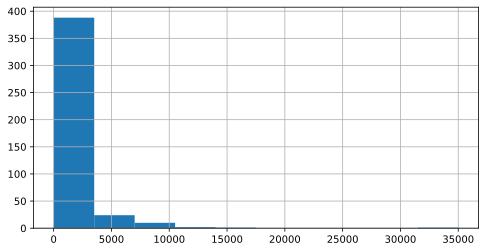

In [ ]:
# Натрийуретический_пептид

df_1['Натрийуретический_пептид'].hist();

In [ ]:
df_1['Натрийуретический_пептид'].value_counts(bins=10)

Натрийуретический_пептид
(-24.991, 3509.0]     388
(3509.0, 7008.0]       24
(7008.0, 10507.0]      10
(10507.0, 14006.0]      2
(14006.0, 17505.0]      1
(31501.0, 35000.0]      1
(17505.0, 21004.0]      0
(21004.0, 24503.0]      0
(24503.0, 28002.0]      0
(28002.0, 31501.0]      0
Name: count, dtype: int64

Значения выше 10000 это либо ошибочные, либо сделаны в других единицах измерения, заполним их Nan, а впоследствии заполним медианой в SimpleImputer

In [ ]:
df_1.loc[df_1['Натрийуретический_пептид'] > 10000, 'Натрийуретический_пептид'] = np.nan

In [ ]:
df_1['Натрийуретический_пептид'].value_counts(bins=10)

Натрийуретический_пептид
(0.76, 933.9]       251
(933.9, 1857.8]      84
(1857.8, 2781.7]     43
(2781.7, 3705.6]     15
(4629.5, 5553.4]      9
(3705.6, 4629.5]      5
(6477.3, 7401.2]      5
(7401.2, 8325.1]      4
(8325.1, 9249.0]      3
(5553.4, 6477.3]      2
Name: count, dtype: int64

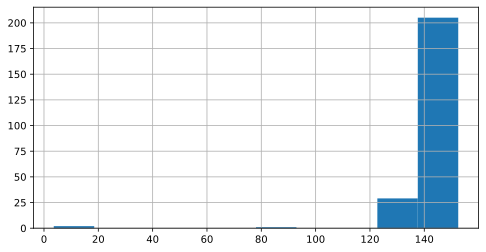

In [ ]:
# Натрий

df_1['Натрий'].hist();

Значения Натрий ниже 100 - это аномалия (ошибка ввода)

In [ ]:
df_1[df_1['Натрий']<100]

Перенес_не_перенес_КВИ  Возраст   Пол  Рост_см  Вес_кг  \
62                    0.000   66.000 0.000  176.000 100.000   
160                   0.000   69.000 0.000  170.000  63.000   
287                   1.000   59.000 0.000  170.000 168.000   

     ИМТ_2_ФОРМУЛА_EXCEL_  Эритроциты  Гемоглобин  Лейкоциты  Лимфоциты_  \
62                 32.283       5.570     125.000      5.400      13.700   
160                21.799       5.260     138.000      8.240      26.800   
287                58.131       5.000     153.000      6.100      15.200   

     ЛИМФОЦИТЫ_АБС_РАСЧЕТ_ПО_ФОРМУЛЕ_  Тромбоциты   СОЭ  Холестерин  ЛПНП  \
62                              0.740     281.000 1.000         NaN 1.920   
160                             2.208     249.000 9.000       5.230 3.560   
287                             0.927     183.000 2.000         NaN   NaN   

     ЛПВП  Индекс_атерогенности_2_формула_excel_  Глюкоза   СРБ  Альбумин  \
62  0.650                                    NaN   11.400 4.670       NaN   
160 1.300                                  3.023    5.320   NaN       NaN   
287   NaN                                    NaN    7.260   NaN       NaN   

       АЛТ    АСТ  Общий_билирубин  Натрийуретический_пептид  Мочевина  \
62   7.500 12.800           35.100                 1,598.000     6.600   
160    NaN 16.100            7.500                   425.700     7.290   
287 13.800 20.400              NaN                 2,681.000     7.200   

     Креатинин_мкмоль_л  СКФ_CKD_EPI_расчет_по_общей_формуле_  Натрий  Калий  \
62              103.000                                64.907   3.600  3.600   
160              75.900                                88.537  92.630    NaN   
287             101.000                                69.814   4.540  4.540   

      АЧТВ   МНО  Фибриноген  D_димер  Фуросемид  Торасемид  Спиронолактон  \
62  32.300 1.370       3.180  718.000      1.000      0.000          1.000   
160 25.300 1.010       3.320      NaN      0.000      0.000          1.000   
287    NaN   NaN         NaN      NaN      1.000      0.000          1.000   

     Валсартан  Лозартан  Изосорбида_динитрат  Периндоприл  Эналаприл  \
62       0.000     0.000                0.000        0.000      0.000   
160      0.000     0.000                0.000        0.000      0.000   
287      0.000     0.000                0.000        0.000      0.000   

     Лизиноприл  Бисопролол  Карведилол  Верапамил  Амлодипин  Дигоксин  \
62        0.000       1.000       0.000      0.000      0.000     1.000   
160       0.000       0.000       0.000      0.000      0.000     0.000   
287       0.000       1.000       0.000      0.000      0.000     0.000   

     Ивабрадин  Гиполипидемические_препараты_статины_  \
62       0.000                                  2.000   
160      0.000                                  2.000   
287      0.000                                  2.000   

     Антикоагулянты_препарат  Антиагреганты_препарат_1  Триметазидин  \
62                     4.000                       NaN         0.000   
160                    0.000                     1.000         0.000   
287                    0.000                       NaN         0.000   

     BPB_голеней  Тромбоэмболический_синдром   ВПС  НЕАЖБП  \
62         0.000                       0.000 0.000   0.000   
160        0.000                       0.000 0.000   0.000   
287        1.000                       0.000 0.000   0.000   

     Гипертрофия_миокарда_левого_желудочка_по_ЭКГ_или_ЭХО_КГ  \
62                                               0.000         
160                                              1.000         
287                                              0.000         

     Блокада_НП_Гисса  Удлинение_интервала_QT  AV_блокада  ХБП_расчет_по_СКФ_  \
62                  0                   0.000           0               2.000   
160                 2                   0.000           0               2.000   
287                 1                

Заполним значением Nan

In [ ]:
df_1.loc[df_1['Натрий'] < 100, 'Натрий'] = np.nan

Создадим свой признак `СТЕПЕНИ_ОЖИРЕНИЯ`, потому как в имеющемся допущены ошибки: у людей с нормальным ИМТ указана 5 степень ожирения.

In [ ]:
# добавим Степень ожирения

def bmi_to_obesity_degree(bmi):
    if 30 <= bmi < 35:
        return "1"
    elif 35 <= bmi < 40:
        return "2"
    elif bmi >= 40:
        return "3"
    else:
        return "0"   # 0 = нет ожирения

# создаём новый столбец
df_1["Степень_ожирения"] = df_1["ИМТ_2_ФОРМУЛА_EXCEL_"].apply(bmi_to_obesity_degree)


<mark> Функция не на своем месте.

In [ ]:
df_1.head()

Перенес_не_перенес_КВИ  Возраст   Пол  Рост_см  Вес_кг  \
0                   0.000   68.000 1.000  158.000  86.000   
1                   0.000   54.000 0.000  180.000 119.000   
2                   0.000   68.000 0.000  174.000 110.000   
3                   0.000   67.000 0.000  189.000 110.000   
4                   0.000   60.000 0.000  178.000 115.000   

   ИМТ_2_ФОРМУЛА_EXCEL_  Эритроциты  Гемоглобин  Лейкоциты  Лимфоциты_  \
0                34.450       5.330     163.000      9.610      31.900   
1                36.728       5.010     130.000     10.480      19.000   
2                36.332         NaN     161.000      5.400      25.600   
3                30.794       4.470     134.000      8.500      13.300   
4                36.296       5.440     166.000      9.060      28.300   

   ЛИМФОЦИТЫ_АБС_РАСЧЕТ_ПО_ФОРМУЛЕ_  Тромбоциты    СОЭ  Холестерин  ЛПНП  \
0                             3.066     201.000  8.000       4.140 2.250   
1                             1.991     288.000  5.000       3.430 1.310   
2                             1.382     114.000 10.000       4.230 2.690   
3                             1.131     175.000  5.000         NaN   NaN   
4                             2.564     226.000  5.000       3.250 1.450   

   ЛПВП  Индекс_атерогенности_2_формула_excel_  Глюкоза    СРБ  Альбумин  \
0 0.970                                  3.268    5.770  0.190       NaN   
1 1.190                                  1.882    5.910    NaN    46.000   
2 0.940                                  3.500    6.610    NaN       NaN   
3   NaN                                    NaN    4.980 20.350    43.600   
4 1.300                                  1.500    9.480    NaN       NaN   

     АЛТ    АСТ  Общий_билирубин  Натрийуретический_пептид  Мочевина  \
0 24.000 21.000              NaN                   197.700       NaN   
1 12.000 14.000              NaN                 2,358.000    10.100   
2 16.500 20.700           18.100                       NaN       NaN   
3 17.900 23.800           23.300                   454.600    10.780   
4    NaN    NaN              NaN                   280.700     3.200   

   Креатинин_мкмоль_л  СКФ_CKD_EPI_расчет_по_общей_формуле_  Натрий  Калий  \
0              79.800                                65.460     NaN  5.760   
1             107.280                                67.224 140.400  4.380   
2             106.200                                61.677 140.600  4.300   
3              91.200                                74.666 140.600  4.000   
4              81.700                                89.585     NaN    NaN   

    АЧТВ   МНО  Фибриноген  D_димер  Фуросемид  Торасемид  Спиронолактон  \
0    NaN   NaN         NaN      NaN      0.000      1.000          1.000   
1 38.200 2.340       3.710      NaN      0.000      1.000          0.000   
2 33.700   NaN         NaN      NaN      1.000      0.000          0.000   
3 26.300 1.090       3.680      NaN      0.000      1.000          1.000   
4    NaN   NaN         NaN      NaN      0.000      1.000          1.000   

   Валсартан  Лозартан  Изосорбида_динитрат  Периндоприл  Эналаприл  \
0      0.000     0.000                0.000        0.000      0.000   
1      0.000     1.000                0.000        0.000      0.000   
2      0.000     1.000                1.000        0.000      0.000   
3      0.000     0.000                0.000        0.000      0.000   
4      0.000     0.000                0.000        0.000      0.000   

   Лизиноприл  Бисопролол  Карведилол  Верапамил  Амлодипин  Дигоксин  \
0       0.000       1.000       0.000      0.000      0.000     0.000   
1       0.000       1.000       0.000      0.000      0.000     1.000   
2       0.000       1.000       0.000      0.000      0.000     0.000   
3       0.000       0.000       0.000      0.000      0.000     0.000   
4       0.000       0.000       0.000      0.000      0.000     0.000   

   Ивабрадин  Гиполипидемические_препараты_статины_ 

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 77 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Перенес_не_перенес_КВИ                                   478 non-null    float64
 1   Возраст                                                  477 non-null    float64
 2   Пол                                                      478 non-null    float64
 3   Рост_см                                                  477 non-null    float64
 4   Вес_кг                                                   477 non-null    float64
 5   ИМТ_2_ФОРМУЛА_EXCEL_                                     477 non-null    float64
 6   Эритроциты                                               475 non-null    float64
 7   Гемоглобин                                               478 non-null    float64
 8   Лейкоциты                     

**ВЫВОД ПО РАЗДЕЛУ "ПРЕДОБРАБОТКА ДАННЫХ":**
  
По результатам предобработки оставлены 74 столбца, из них 1 целевой признак и 73 признака.

- сократили количество признаков, сделали начальный отбор, удалили признаки с пропусками более 90%.

- бинарные признаки `Перенес_не_перенес_КВИ`, `Пол`, `Тромбоэмболический_синдром`, `ВПС`, `БА`, `ХОБЛ_ЕСТЬ_НЕТ_`, `ИБС_ПИКС` приведены к значениям `0` и `1`

- исправлены строковые значения в столбцах ВРВ_голеней (значение 2-3), Блокада_НП_Гисса (значение 1-2), AV_блокада (значения 2-3, 1-2), ХСН_по_фракции_выброса_

- выявлены допустимые нормы по показателям крови, в результате заменены на `Nan` аномалии в признаках: `ИМТ_2_ФОРМУЛА_EXCEL_` (слишком низкое значение < 5), `Альбумин`  (значение меньше 10),
`Натрийуретический_пептид`, `Натрий` (<120)

- избавились от дублирующих признаков

- удалены признаки-маркеры заболевания диабетом (утечка):
`Гликированный_гемоглобин`, `Метформин`, `Дапаглифлозин`

- удалены противовирусные: `Фавипиравир`, `Молнупиравир`, связи с диабетом нет.

- удалены признаки `Аблация` и `АКШ` для уменьшения шума, они не информативны для модели, поскольку связаны с аритмией и ишемической болезнью сердца.

## Исследовательский анализ

Итак, мы имеем датафрейм из 478 строк (478 пациента), и 74 столбцов. Количественных непрерывных признаков 32. Категориальных признаков 42. Целевой признак риска - `Сахарный_диабет_ЕСТЬ_НЕТ_`

In [ ]:
df_num_col_cont = ['Возраст', 'Рост_см','Вес_кг','ИМТ_2_ФОРМУЛА_EXCEL_','Эритроциты', 'Гемоглобин', 'Лейкоциты',
            'Лимфоциты_', 'ЛИМФОЦИТЫ_АБС_РАСЧЕТ_ПО_ФОРМУЛЕ_', 'Тромбоциты', 'СОЭ','Холестерин','ЛПНП','ЛПВП',
           'Индекс_атерогенности_2_формула_excel_', 'Глюкоза', 'СРБ', 'Альбумин', 'АЛТ', 'АСТ',
            'Общий_билирубин', 'Натрийуретический_пептид', 'Мочевина', 'Креатинин_мкмоль_л',
            'СКФ_CKD_EPI_расчет_по_общей_формуле_', 'Натрий','Калий','АЧТВ','МНО', 'Фибриноген', 'D_димер',
            'ХСН_по_фракции_выброса_clean']

In [ ]:
len(df_num_col_cont)

32

In [ ]:
category_cols = ['Перенес_не_перенес_КВИ', 'Пол', 'Фуросемид', 'Торасемид', 'Спиронолактон', 'Валсартан',
                 'Лозартан', 'Изосорбида_динитрат', 'Периндоприл', 'Эналаприл', 'Лизиноприл', 'Бисопролол',
                 'Карведилол', 'Верапамил', 'Амлодипин', 'Дигоксин', 'Ивабрадин',
                 'Гиполипидемические_препараты_статины_', 'Антикоагулянты_препарат',
                 'Антиагреганты_препарат_1', 'Триметазидин', 'BPB_голеней', 'Тромбоэмболический_синдром',
                 'ВПС', 'НЕАЖБП', 'Гипертрофия_миокарда_левого_желудочка_по_ЭКГ_или_ЭХО_КГ',
                 'Блокада_НП_Гисса', 'Удлинение_интервала_QT', 'AV_блокада', 'ХБП_расчет_по_СКФ_',
                 'Мерцательная_аритмия', 'БА', 'ХОБЛ_ЕСТЬ_НЕТ_', 'ИБС_Стенокардия', 'ИБС_Стенокардия_ЕСТЬ_НЕТ_',
                 'ИБС_ПИКС', 'АГ_стадия',
                 'АГ_степень', 'АГ_риск', 'ХСН_стадии', 'ХСН_ФК', 'Степень_ожирения']

In [ ]:
len(category_cols)

42

In [ ]:
df_1.head()

Перенес_не_перенес_КВИ  Возраст   Пол  Рост_см  Вес_кг  \
0                   0.000   68.000 1.000  158.000  86.000   
1                   0.000   54.000 0.000  180.000 119.000   
2                   0.000   68.000 0.000  174.000 110.000   
3                   0.000   67.000 0.000  189.000 110.000   
4                   0.000   60.000 0.000  178.000 115.000   

   ИМТ_2_ФОРМУЛА_EXCEL_  Эритроциты  Гемоглобин  Лейкоциты  Лимфоциты_  \
0                34.450       5.330     163.000      9.610      31.900   
1                36.728       5.010     130.000     10.480      19.000   
2                36.332         NaN     161.000      5.400      25.600   
3                30.794       4.470     134.000      8.500      13.300   
4                36.296       5.440     166.000      9.060      28.300   

   ЛИМФОЦИТЫ_АБС_РАСЧЕТ_ПО_ФОРМУЛЕ_  Тромбоциты    СОЭ  Холестерин  ЛПНП  \
0                             3.066     201.000  8.000       4.140 2.250   
1                             1.991     288.000  5.000       3.430 1.310   
2                             1.382     114.000 10.000       4.230 2.690   
3                             1.131     175.000  5.000         NaN   NaN   
4                             2.564     226.000  5.000       3.250 1.450   

   ЛПВП  Индекс_атерогенности_2_формула_excel_  Глюкоза    СРБ  Альбумин  \
0 0.970                                  3.268    5.770  0.190       NaN   
1 1.190                                  1.882    5.910    NaN    46.000   
2 0.940                                  3.500    6.610    NaN       NaN   
3   NaN                                    NaN    4.980 20.350    43.600   
4 1.300                                  1.500    9.480    NaN       NaN   

     АЛТ    АСТ  Общий_билирубин  Натрийуретический_пептид  Мочевина  \
0 24.000 21.000              NaN                   197.700       NaN   
1 12.000 14.000              NaN                 2,358.000    10.100   
2 16.500 20.700           18.100                       NaN       NaN   
3 17.900 23.800           23.300                   454.600    10.780   
4    NaN    NaN              NaN                   280.700     3.200   

   Креатинин_мкмоль_л  СКФ_CKD_EPI_расчет_по_общей_формуле_  Натрий  Калий  \
0              79.800                                65.460     NaN  5.760   
1             107.280                                67.224 140.400  4.380   
2             106.200                                61.677 140.600  4.300   
3              91.200                                74.666 140.600  4.000   
4              81.700                                89.585     NaN    NaN   

    АЧТВ   МНО  Фибриноген  D_димер  Фуросемид  Торасемид  Спиронолактон  \
0    NaN   NaN         NaN      NaN      0.000      1.000          1.000   
1 38.200 2.340       3.710      NaN      0.000      1.000          0.000   
2 33.700   NaN         NaN      NaN      1.000      0.000          0.000   
3 26.300 1.090       3.680      NaN      0.000      1.000          1.000   
4    NaN   NaN         NaN      NaN      0.000      1.000          1.000   

   Валсартан  Лозартан  Изосорбида_динитрат  Периндоприл  Эналаприл  \
0      0.000     0.000                0.000        0.000      0.000   
1      0.000     1.000                0.000        0.000      0.000   
2      0.000     1.000                1.000        0.000      0.000   
3      0.000     0.000                0.000        0.000      0.000   
4      0.000     0.000                0.000        0.000      0.000   

   Лизиноприл  Бисопролол  Карведилол  Верапамил  Амлодипин  Дигоксин  \
0       0.000       1.000       0.000      0.000      0.000     0.000   
1       0.000       1.000       0.000      0.000      0.000     1.000   
2       0.000       1.000       0.000      0.000      0.000     0.000   
3       0.000       0.000       0.000      0.000      0.000     0.000   
4       0.000       0.000       0.000      0.000      0.000     0.000   

   Ивабрадин  Гиполипидемические_препараты_статины_ 

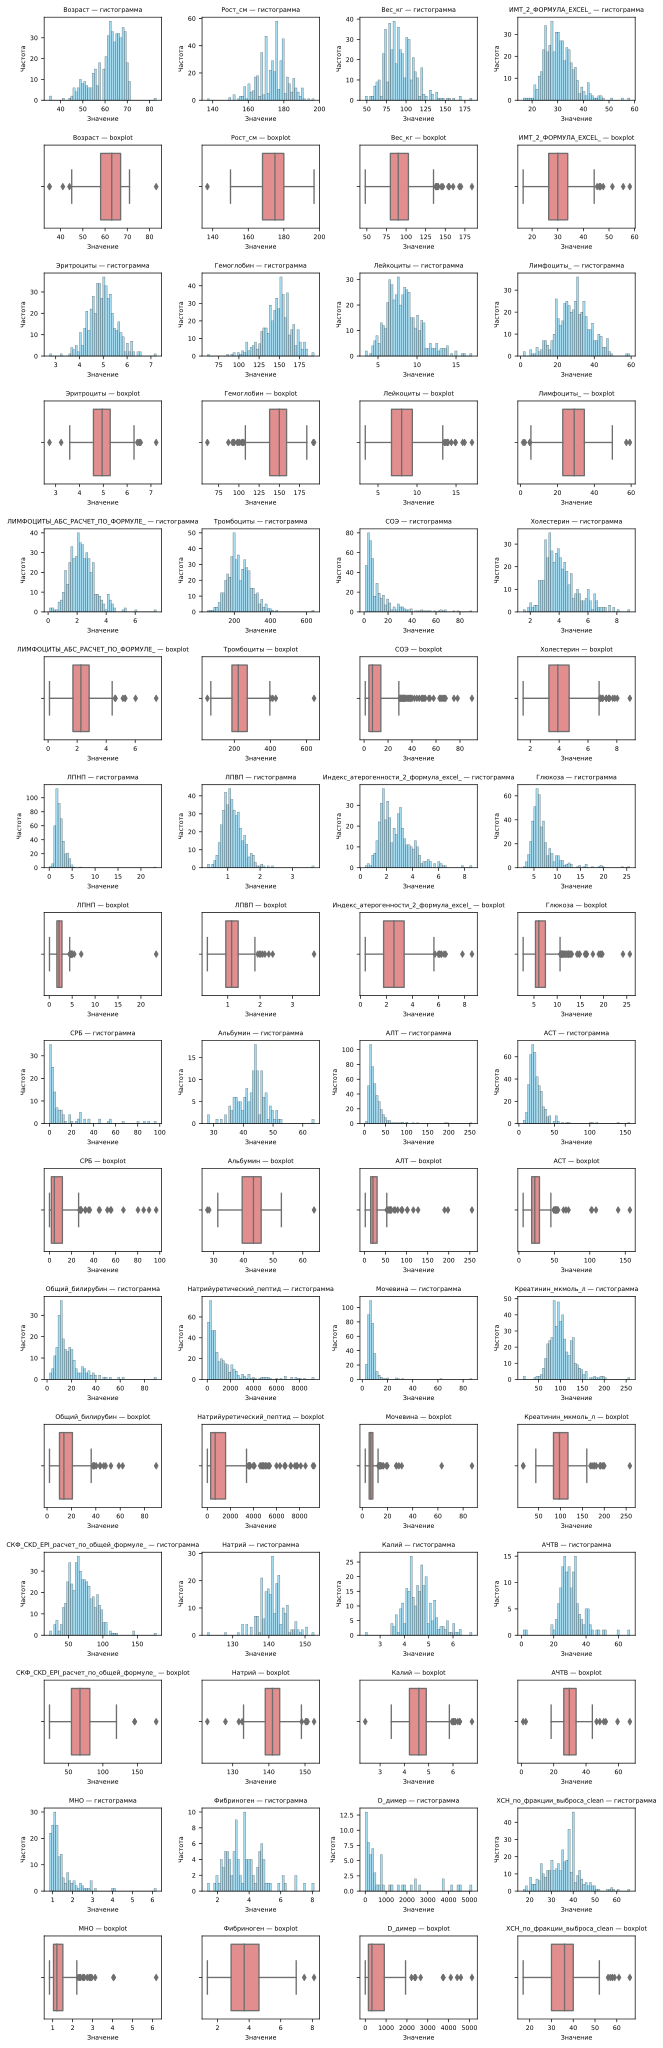

count      mean       std     min  \
Возраст                               477.000    61.748     6.589  35.000   
Рост_см                               477.000   173.715     8.387 137.000   
Вес_кг                                477.000    92.333    19.153  48.000   
ИМТ_2_ФОРМУЛА_EXCEL_                  477.000    30.543     5.652  16.515   
Эритроциты                            475.000     4.959     0.566   2.740   
Гемоглобин                            478.000   147.726    18.175  61.000   
Лейкоциты                             477.000     8.260     2.175   3.370   
Лимфоциты_                            477.000    28.732     9.114   1.400   
ЛИМФОЦИТЫ_АБС_РАСЧЕТ_ПО_ФОРМУЛЕ_      476.000     2.335     0.900   0.097   
Тромбоциты                            474.000   229.063    66.300  51.000   
СОЭ                                   433.000    11.924    13.346   1.000   
Холестерин                            455.000     4.117     1.181   1.510   
ЛПНП                                  442.000     2.356     1.357   0.060   
ЛПВП                                  436.000     1.162     0.328   0.370   
Индекс_атерогенности_2_формула_excel_ 431.000     2.717     1.194   0.373   
Глюкоза                               451.000     6.884     2.833   2.670   
СРБ                                   125.000    12.163    19.175   0.000   
Альбумин                              148.000    42.872     4.889  27.900   
АЛТ                                   421.000    25.856    22.538   1.930   
АСТ                                   410.000    25.503    14.485   6.000   
Общий_билирубин                       229.000    17.238    11.152   2.000   
Натрийуретический_пептид              421.000 1,271.847 1,573.317  10.000   
Мочевина                              365.000     7.812     6.098   2.400   
Креатинин_мкмоль_л                    467.000   101.951    27.448  14.700   
СКФ_CKD_EPI_расчет_по_общей_формуле_  467.000    68.837    19.193  22.571   
Натрий                                234.000   140.993     3.751 123.000   
Калий                                 278.000     4.615     0.598   2.390   
АЧТВ                                  146.000    30.832     8.058   1.100   
МНО                                   174.000     1.424     0.678   0.840   
Фибриноген                            103.000     3.773     1.258   1.360   
D_димер                                61.000   928.587 1,302.722   0.100   
ХСН_по_фракции_выброса_clean          379.000    35.092     7.790  17.000   

                                          25%     50%       75%       max  
Возраст                                58.000  63.000    67.000    83.000  
Рост_см                               168.000 175.000   180.000   197.000  
Вес_кг                                 80.000  90.000   103.000   184.000  
ИМТ_2_ФОРМУЛА_EXCEL_                   26.472  30.027    33.897    58.131  
Эритроциты                              4.585   4.950     5.290     7.220  
Гемоглобин                            138.000 150.000   159.000   193.000  
Лейкоциты                               6.730   8.030     9.400    17.040  
Лимфоциты_                             22.900  29.100    34.600    59.300  
ЛИМФОЦИТЫ_АБС_РАСЧЕТ_ПО_ФОРМУЛЕ_        1.711   2.259     2.828     7.445  
Тромбоциты                            187.000 222.000   272.000   642.000  
СОЭ                                     4.000   7.000    14.000    90.000  
Холестерин                              3.290   3.910     4.695     8.900  
ЛПНП                                    1.670   2.140     2.788    23.320  
ЛПВП                                    0.940   1.120     1.323     3.670  
Индекс_атерогенности_2_формула_excel_   1.780   2.573     3.356     8.560  
Глюкоза                                 5.320   6.040     7.465    25.660  
СРБ                                     1.700   4.400    11.700    96.730  
Альбумин                               39.600  43.400    46.000    63.800  
АЛТ                                    14.700  20.200 

In [ ]:
# Изучим распределение количественных непрерывных признаков

stats = plot_numeric_distributions(
    df_1, df_num_col_cont, cols=4, bins=50,
    percentile_clip=None,
    log_hist=False
)
stats

В данных присутствуют признаки с правосторонней асимметрией распределения, характерной для логнормального распределения. Проверим это предположение с помощью логарифмического преобразования данных.

**Создадим трансформер делающий логарифмическое преобразование для определенных столбцов датафрейма**

In [ ]:
# Применяем к конкретным столбцам
columns_to_transform = [
    'ЛПНП',  'АЛТ', 'АСТ', 'СОЭ', 'Натрийуретический_пептид',
    'Мочевина', 'D_димер', 'МНО', 'Глюкоза', 'Холестерин', 'СРБ',
    'Общий_билирубин', 'Вес_кг', 'Лейкоциты', 'ИМТ_2', 'Глюкоза', 'Холестерин',
    'СРБ', 'ЛПВП', 'СКФ_CKD_EPI_расчет_по_общей_формуле_'
]

df_log = df_1.copy()
for col in columns_to_transform:
    if col in df_log.columns:
        df_log[col] = np.log1p(df_log[col].where(df_log[col].notna()))

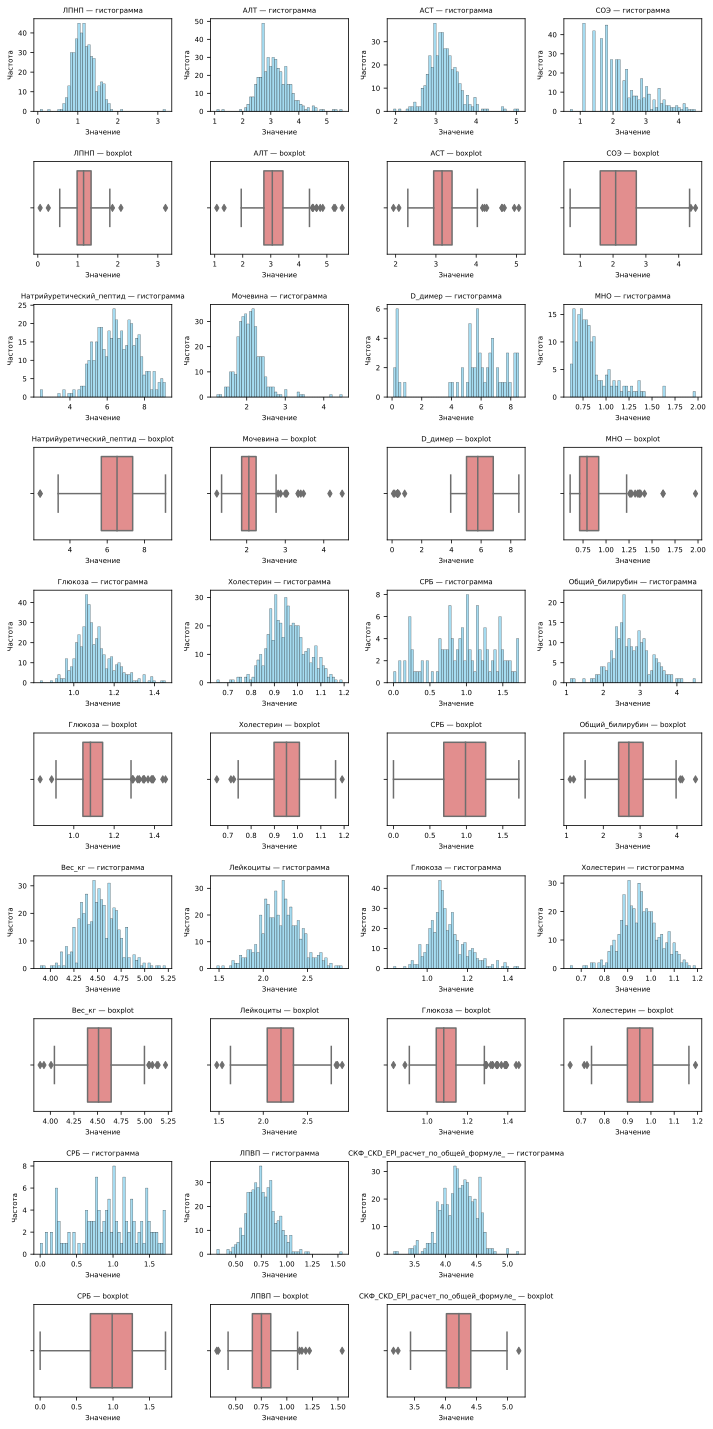

In [ ]:
stats = plot_numeric_distributions(
    df_log, columns_to_transform, cols=4, bins=50,
    percentile_clip=None,
    log_hist=False
)
#stats

**Вывод по исследовательскому анализу непрерывных величин:**

- `Рост_см`, `Эритроциты`, `Лимфоциты`, `АЧТВ`, `Калий` - имеют распределение блиское к нормальному, их среднее и медиана близки по значению;
- `Возраст`, `Гемоглобин` - имеют левосторонюю ассиметрию, что говорит о большем количестве больших значений нежели малых, что подтверждает значение медианы большей, чем среднее;
- `ЛПНП`, `ЛПВП`, `АЛТ`, `АСТ` , `СОЭ`, `Натрийуретический пептид`, `Мочевина`, `D_димер`,  `МНО`, `Лейкоциты`, `СРБ`  - имеют логнормальное распределение, у которого имеется резкая правосторонняя асимметрия (положительный перекос) и после логарифмического преобразования распределение стало похожим на нормальное;
-  `Вес_кг`, `ИМТ_2`, `Холестерин`, `СКФ_CKD_EPI_расчет_по_общей_формуле_`, `Глюкоза` - имеют правосторонюю ассиметрию, что говорит о большем количестве малых значений нежели больших, что подтверждает значение медианы меньшей, чем среднее.

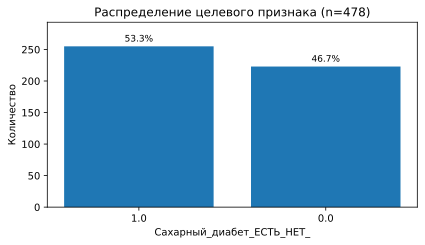

class  count  percent
0   1.0    255   53.350
1   0.0    223   46.650

In [ ]:
# распределение целевого признака

plot_target_distribution(df_1['Сахарный_диабет_ЕСТЬ_НЕТ_'])

Практически отсутствует дисбаланс целевой переменной

### Новые признаки

In [ ]:
# добавим признак `количество сопутствующих заболеваний`

df_1['количество_сопутствующих_заболеваний'] = (
(df_1['АГ_стадия'] > 1.0).astype(int) +
(df_1['ИМТ_2_ФОРМУЛА_EXCEL_'] > 30.0).astype(int) +
(df_1['ХСН_стадии'] > 0.0).astype(int) + # Стадия 1 часто бессимптомна
(pd.to_numeric(df_1['ХБП_расчет_по_СКФ_'], errors='coerce').fillna(0) > 1).astype(int) # ХБП, если стадия > 1
)


In [ ]:
# добавим признак ИМТ с Глюкозой

df_1['взаимодействие_имт_глюкоза'] = df_1['ИМТ_2_ФОРМУЛА_EXCEL_'] * df_1['Глюкоза']

In [ ]:
df_1.head()

Перенес_не_перенес_КВИ  Возраст   Пол  Рост_см  Вес_кг  \
0                   0.000   68.000 1.000  158.000  86.000   
1                   0.000   54.000 0.000  180.000 119.000   
2                   0.000   68.000 0.000  174.000 110.000   
3                   0.000   67.000 0.000  189.000 110.000   
4                   0.000   60.000 0.000  178.000 115.000   

   ИМТ_2_ФОРМУЛА_EXCEL_  Эритроциты  Гемоглобин  Лейкоциты  Лимфоциты_  \
0                34.450       5.330     163.000      9.610      31.900   
1                36.728       5.010     130.000     10.480      19.000   
2                36.332         NaN     161.000      5.400      25.600   
3                30.794       4.470     134.000      8.500      13.300   
4                36.296       5.440     166.000      9.060      28.300   

   ЛИМФОЦИТЫ_АБС_РАСЧЕТ_ПО_ФОРМУЛЕ_  Тромбоциты    СОЭ  Холестерин  ЛПНП  \
0                             3.066     201.000  8.000       4.140 2.250   
1                             1.991     288.000  5.000       3.430 1.310   
2                             1.382     114.000 10.000       4.230 2.690   
3                             1.131     175.000  5.000         NaN   NaN   
4                             2.564     226.000  5.000       3.250 1.450   

   ЛПВП  Индекс_атерогенности_2_формула_excel_  Глюкоза    СРБ  Альбумин  \
0 0.970                                  3.268    5.770  0.190       NaN   
1 1.190                                  1.882    5.910    NaN    46.000   
2 0.940                                  3.500    6.610    NaN       NaN   
3   NaN                                    NaN    4.980 20.350    43.600   
4 1.300                                  1.500    9.480    NaN       NaN   

     АЛТ    АСТ  Общий_билирубин  Натрийуретический_пептид  Мочевина  \
0 24.000 21.000              NaN                   197.700       NaN   
1 12.000 14.000              NaN                 2,358.000    10.100   
2 16.500 20.700           18.100                       NaN       NaN   
3 17.900 23.800           23.300                   454.600    10.780   
4    NaN    NaN              NaN                   280.700     3.200   

   Креатинин_мкмоль_л  СКФ_CKD_EPI_расчет_по_общей_формуле_  Натрий  Калий  \
0              79.800                                65.460     NaN  5.760   
1             107.280                                67.224 140.400  4.380   
2             106.200                                61.677 140.600  4.300   
3              91.200                                74.666 140.600  4.000   
4              81.700                                89.585     NaN    NaN   

    АЧТВ   МНО  Фибриноген  D_димер  Фуросемид  Торасемид  Спиронолактон  \
0    NaN   NaN         NaN      NaN      0.000      1.000          1.000   
1 38.200 2.340       3.710      NaN      0.000      1.000          0.000   
2 33.700   NaN         NaN      NaN      1.000      0.000          0.000   
3 26.300 1.090       3.680      NaN      0.000      1.000          1.000   
4    NaN   NaN         NaN      NaN      0.000      1.000          1.000   

   Валсартан  Лозартан  Изосорбида_динитрат  Периндоприл  Эналаприл  \
0      0.000     0.000                0.000        0.000      0.000   
1      0.000     1.000                0.000        0.000      0.000   
2      0.000     1.000                1.000        0.000      0.000   
3      0.000     0.000                0.000        0.000      0.000   
4      0.000     0.000                0.000        0.000      0.000   

   Лизиноприл  Бисопролол  Карведилол  Верапамил  Амлодипин  Дигоксин  \
0       0.000       1.000       0.000      0.000      0.000     0.000   
1       0.000       1.000       0.000      0.000      0.000     1.000   
2       0.000       1.000       0.000      0.000      0.000     0.000   
3       0.000       0.000       0.000      0.000      0.000     0.000   
4       0.000       0.000       0.000      0.000      0.000     0.000   

   Ивабрадин  Гиполипидемические_препараты_статины_ 

### Портрет диабетика

In [ ]:
df_num_col_cont = ['Возраст','Рост_см','Вес_кг','ИМТ_2_ФОРМУЛА_EXCEL_','Эритроциты', 'Гемоглобин', 'Лейкоциты',
                 'Лимфоциты_', 'ЛИМФОЦИТЫ_АБС_РАСЧЕТ_ПО_ФОРМУЛЕ_', 'Тромбоциты', 'СОЭ',
                 'Индекс_атерогенности_2_формула_excel_', 'Глюкоза', 'Холестерин','ЛПНП','ЛПВП', 'СРБ',
                 'Альбумин', 'АЛТ', 'АСТ', 'Креатинин_мкмоль_л', 'Общий_билирубин', 'Натрийуретический_пептид',
                 'Мочевина', 'СКФ_CKD_EPI_расчет_по_общей_формуле_', 'Натрий','Калий','АЧТВ','МНО',
                 'Фибриноген','D_димер', 'ХСН_по_фракции_выброса_clean', 'количество_сопутствующих_заболеваний',
                  'взаимодействие_имт_глюкоза']


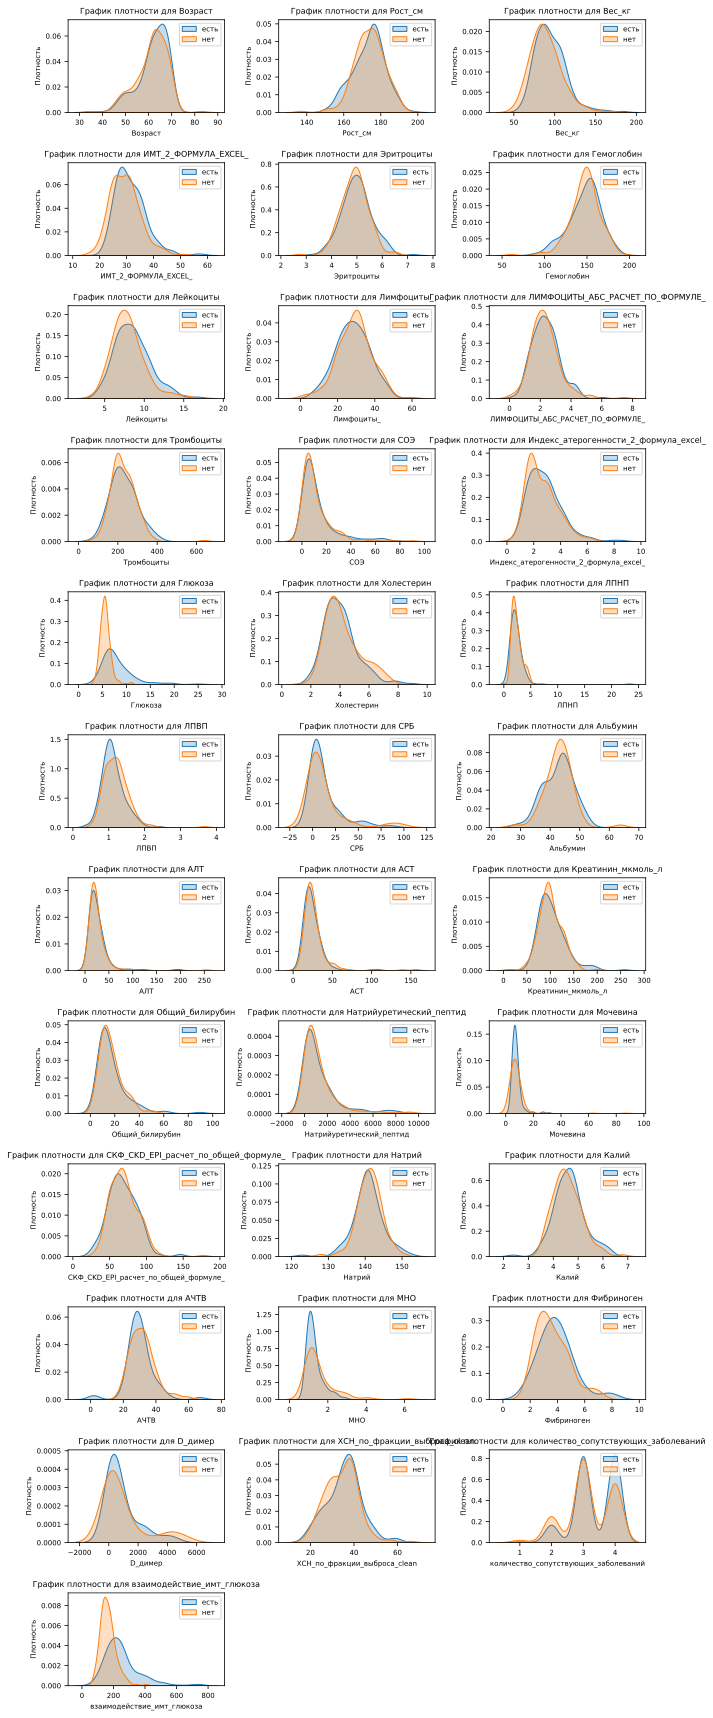

In [ ]:
# для непрерывных количественных признаков

plot_kde_by_target(
    df=df_1,
    features=df_num_col_cont,
    target='Сахарный_диабет_ЕСТЬ_НЕТ_',
    pos_val=1, neg_val=0,
    cols=3,
    percentile_clip=None
);

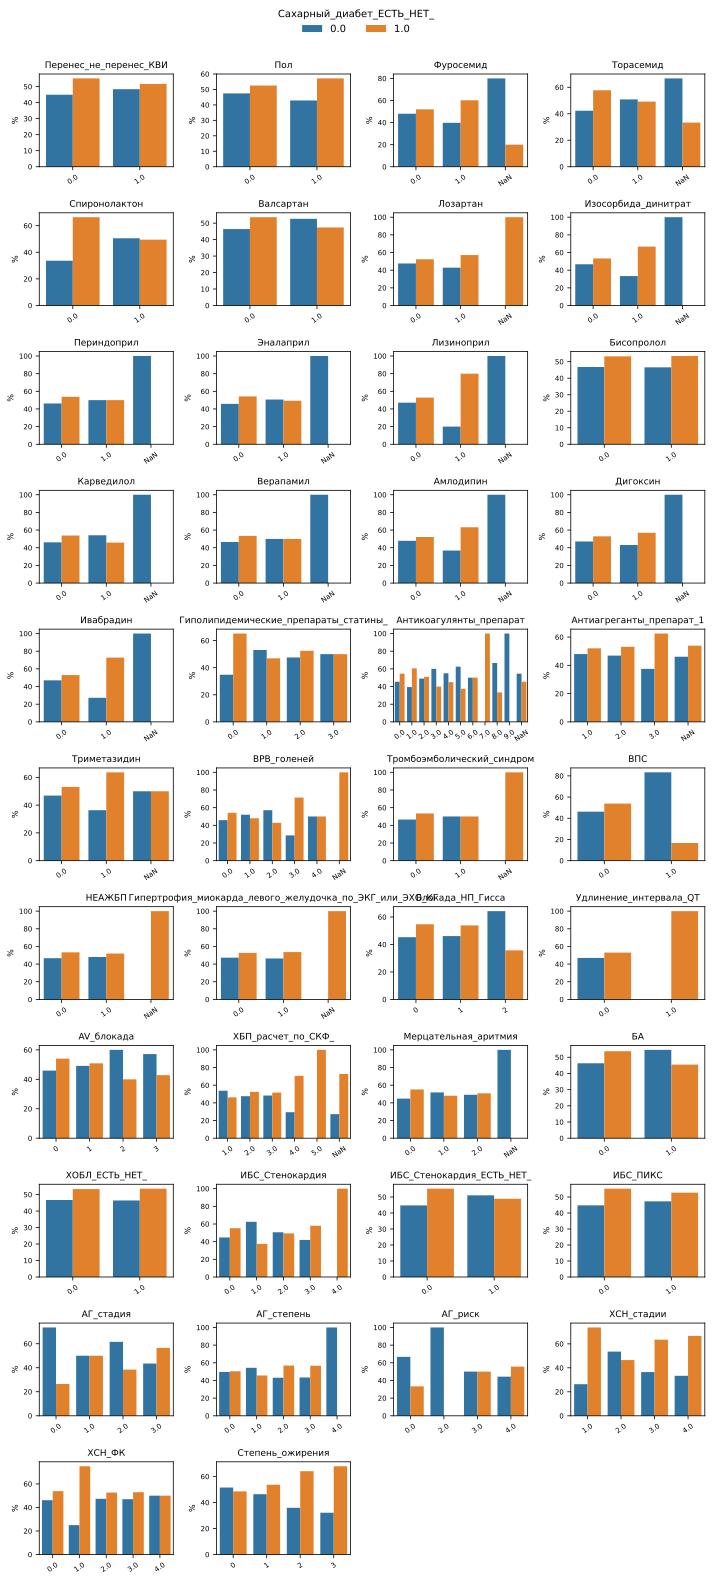

In [ ]:
# зависимость целевого от категориальных признаков

plot_categorical_grid(df_1, cols=category_cols, target='Сахарный_диабет_ЕСТЬ_НЕТ_',
                      per_row=4, top_n=12, normalize=True, legend_outside=False)

**Вывод по портрету диабетика**

Различие между распределениями непрерывных величин у людей с сахарным диабетом и без наблюдается:

- Глюкоза - сильное изменение пикового значения, большая часть наблюдений сместилась вправо;
- МНО - увеличилось кол-во пиковых значений для людей с сахарным диабетом;
- кол-во сопутствующих заболеваний - распределения для людей с сахарным диабетом стало иметь более выраженную двумодальность (людей с большим кол-вом сопутствующих заболеваний увеличилось).

Для категориальных признаков замечено: у людей с сахарным диабетом:

- удлинен интервал QT,
- стадии ХСН выше,
- имеется серьезная стенокардия,
- чаще принимают ивабрадин
- чаще встречается высокая степень ожирения по ИМТ.

**ВЫВОД ПО ИССЛЕДОВАТЕЛЬСКОМУ АНАЛИЗУ**

***Распределение количественных признаков***

Близкие к нормальному распределению: `Рост_см`, `Эритроциты`, `Лимфоциты`, `АЧТВ`, `Калий` — среднее и медиана практически совпадают.

Левосторонняя асимметрия: `Возраст`, `Гемоглобин` — характерно большее количество больших значений; медиана выше среднего.

Логнормальное распределение: `ЛПНП`, `ЛПВП`, `АЛТ`, `АСТ`, `СОЭ`, `Натрийуретический пептид`, `Мочевина`, `D_димер`, `МНО`, `Лейкоциты`, `СРБ` — ярко выраженный правосторонний перекос, который корректируется логарифмическим преобразованием.

Правосторонняя асимметрия: `Вес_кг`, `ИМТ_2`, `Холестерин`, `СКФ_CKD_EPI_расчет_по_общей_формуле_`, `Глюкоза` — преобладает большее число малых значений; медиана ниже среднего.

***Баланс классов***

Целевая переменная почти сбалансирована: 53,3% — с диабетом, 46,6% — без диабета.

***Сконструированные признаки***

Добавлен признак `количество сопутствующих заболеваний`.

Добавлен признак взаимодействия ИМТ × Глюкоза.

🧑‍⚕️ ***«Портрет» диабетика (по сравнению с недиабетиками)***

Количественные признаки

- Глюкоза — распределение заметно смещено вправо, значения выше.

- МНО — увеличено количество пиковых значений.

- Количество сопутствующих заболеваний — распределение стало более двумодальным: у диабетиков чаще встречается большое число сопутствующих патологий.

Категориальные признаки

- Чаще встречается удлинённый интервал QT.

- Более высокие стадии ХСН.

- Серьёзная стенокардия регистрируется чаще.

- Ивабрадин принимают чаще.

- Выше вероятность ожирения высокой степени по ИМТ.

📌 Таким образом, диабет в выборке ассоциирован как с изменениями в лабораторных показателях (глюкоза, МНО), так и с выраженным бременем сопутствующих заболеваний и приёмом специфической терапии.

## Отбор признаков

Используем коэффициент φₖ (Phi_k), который корректно измеряет силу связи между признаками любой природы (числовые, порядковые, категориальные) и таргетом, в том числе при нелинейных зависимостях.

Для отбора признаков с помощью PhiK потребуется сначала заполнить пропуски. Сделаем все это в пайплайне.

In [ ]:
# выделим X, y

y = df_1[TARGET].astype("int")
X = df_1.drop(columns=[TARGET, 'ХСН_по_фракции_выброса_'])

In [ ]:
# создадим пайплайн по отбору ТОП-30 признаков по PhiK

num_selector = lambda X: [c for c in num_cols if c in X.columns] # селекторы-коллбэки: вернут только те имена, которые есть на входе шага
cat_selector = lambda X: [c for c in category_cols if c in X.columns]

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler",  StandardScaler()),
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("to_str",  FunctionTransformer(lambda X: X.astype(str))),   # float-категории -> str
    ("onehot",  OneHotEncoder(handle_unknown="ignore", sparse=False)),
])

prep = ColumnTransformer([
    ("num", num_pipe, num_selector),   # <- передаем коллбэк, не фиксированный список
    ("cat", cat_pipe, cat_selector),
], remainder="drop")


In [ ]:
# отбор по PhiK → оставляем top-30 сырых признаков

phik_selector = SelectByPhik(target=TARGET, top_k=30, interval_cols=df_num_col_cont)

In [ ]:
phik_selector.fit(X, y)

SelectByPhik(interval_cols=['Возраст', 'Рост_см', 'Вес_кг',
                            'ИМТ_2_ФОРМУЛА_EXCEL_', 'Эритроциты', 'Гемоглобин',
                            'Лейкоциты', 'Лимфоциты_',
                            'ЛИМФОЦИТЫ_АБС_РАСЧЕТ_ПО_ФОРМУЛЕ_', 'Тромбоциты',
                            'СОЭ', 'Индекс_атерогенности_2_формула_excel_',
                            'Глюкоза', 'Холестерин', 'ЛПНП', 'ЛПВП', 'СРБ',
                            'Альбумин', 'АЛТ', 'АСТ', 'Креатинин_мкмоль_л',
                            'Общий_билирубин', 'Натрийуретический_пептид',
                            'Мочевина', 'СКФ_CKD_EPI_расчет_по_общей_формуле_',
                            'Натрий', 'Калий', 'АЧТВ', 'МНО', 'Фибриноген', ...],
             target='Сахарный_диабет_ЕСТЬ_НЕТ_')

In [ ]:
# извлечем ТОП-30 признаков по PhiK

phik_cols = phik_selector.selected_cols_
print("Топ по PhiK:", phik_cols)

Топ по PhiK: ['взаимодействие_имт_глюкоза', 'Глюкоза', 'ИМТ_2_ФОРМУЛА_EXCEL_', 'СТЕПЕНИ_ОЖИРЕНИЯ_ПО_ИМТ', 'ХСН_стадии', 'АГ_стадия', 'Спиронолактон', 'Вес_кг', 'АГ_риск', 'Холестерин', 'количество_сопутствующих_заболеваний', 'Гемоглобин', 'Степень_ожирения', 'Эритроциты', 'ЛПВП', 'Креатинин_мкмоль_л', 'АЧТВ', 'Лейкоциты', 'Гиполипидемические_препараты_статины_', 'Торасемид', 'Антикоагулянты_препарат', 'Общий_билирубин', 'Рост_см', 'МНО', 'Тромбоциты', 'ХСН_по_фракции_выброса_clean', 'ЛИМФОЦИТЫ_АБС_РАСЧЕТ_ПО_ФОРМУЛЕ_', 'Амлодипин', 'ВПС', 'АГ_степень']


**ВЫВОД ПО РАЗДЕЛУ "ОТБОР ПРИЗНАКОВ"**

По результатам отбора по PhiK отобрано 30 признаков, лучше всего коррелирующих с целевой переменной:

- `взаимодействие_имт_глюкоза`,
- `Глюкоза`,
- `ИМТ_2_ФОРМУЛА_EXCEL_`,
- `СТЕПЕНИ_ОЖИРЕНИЯ_ПО_ИМТ`,
- `ХСН_стадии`,
- `АГ_стадия`,
- `Спиронолактон`,
- `Вес_кг`,
- `АГ_риск`,
- `Холестерин`,
- `количество_сопутствующих_заболеваний`,
- `Гемоглобин`,
- `Степень_ожирения`,
- а также `Эритроциты`, `ЛПВП`, `Креатинин_мкмоль_л`, `АЧТВ`, `Лейкоциты`, `Гиполипидемические_препараты_статины_`, `Торасемид`, `Антикоагулянты_препарат`, `Общий_билирубин`, `Рост_см`, `МНО`, `Тромбоциты`, `ХСН_по_фракции_выброса_clean`, `ЛИМФОЦИТЫ_АБС_РАСЧЕТ_ПО_ФОРМУЛЕ_`, `Амлодипин`, `ВПС`, `АГ_степень`

## Корреляционный анализ

Проведем корреляционный анализ для выявления связи отдельных признаков с целевой и мультиколлинеарности признаков

In [ ]:
print(phik_cols)

['взаимодействие_имт_глюкоза', 'Глюкоза', 'ИМТ_2_ФОРМУЛА_EXCEL_', 'СТЕПЕНИ_ОЖИРЕНИЯ_ПО_ИМТ', 'ХСН_стадии', 'АГ_стадия', 'Спиронолактон', 'Вес_кг', 'АГ_риск', 'Холестерин', 'количество_сопутствующих_заболеваний', 'Гемоглобин', 'Степень_ожирения', 'Эритроциты', 'ЛПВП', 'Креатинин_мкмоль_л', 'АЧТВ', 'Лейкоциты', 'Гиполипидемические_препараты_статины_', 'Торасемид', 'Антикоагулянты_препарат', 'Общий_билирубин', 'Рост_см', 'МНО', 'Тромбоциты', 'ХСН_по_фракции_выброса_clean', 'ЛИМФОЦИТЫ_АБС_РАСЧЕТ_ПО_ФОРМУЛЕ_', 'Амлодипин', 'ВПС', 'АГ_степень']


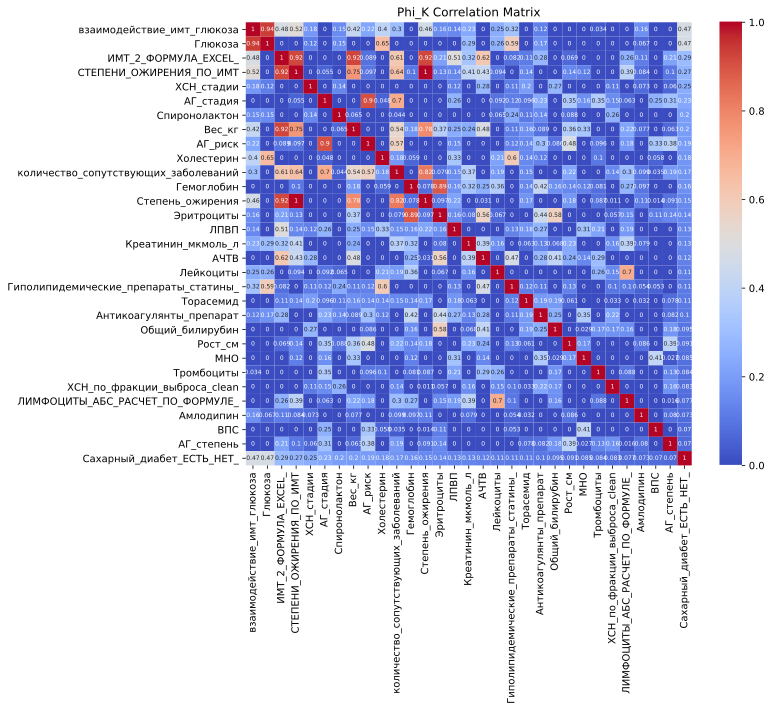

In [ ]:
# Вычисление матрицы корреляции с использованием phik

corr_matrix = df_1[phik_cols + [TARGET]].phik_matrix(df_num_col_cont)

# Визуализация матрицы корреляции

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 6})
plt.title('Phi_K Correlation Matrix')
plt.show()

Оценим силу связи по шкале Чеддока, где слабая — от 0,1 до 0,3; умеренная — от 0,3 до 0,5; заметная — от 0,5 до 0,7; высокая — от 0,7 до 0,9; весьма высокая (сильная) — от 0,9 до 1,0.

По результатам наблюдается УМЕРЕННАЯ СВЯЗЬ целевого признака с:

- `Глюкоза`
- `взаимодействие_имт_глюкоза`

СЛАБАЯ СВЯЗЬ:

- `ИМТ_2_ФОРМУЛА_EXCEL_`
- `СТЕПЕНИ_ОЖИРЕНИЯ_ПО_ИМТ`,
- `ХСН_стадии`,
- `АГ_стадия`,
- `Спиронолактон`,
- `Вес_кг`,
- `АГ_риск`,
- `Холестерин`,
- `количество_сопутствующих_заболеваний`,
- `Гемоглобин`,
- `Степень_ожирения`,
- `Эритроциты`,
- `ЛПВП`,
- `Креатинин_мкмоль_л`,
- `АЧТВ`,
- `Лейкоциты`,
- `Гиполипидемические_препараты_статины_`,
- `Торасемид`,
- `Антикоагулянты_препарат`


## Подготовка данных к моделированию

Перед нами стоит задача бинарной классификации - 2 класса для прогнозирования. Важна точность предсказания каждого класса. Возьмем метрику macro F1-score, она считает f1-score для каждого класса, а потом усредняет результат.

Также обратим внимание на recall, чтобы не упускать положительные случаи заболевания диабетом и построим матрицу ошибок confusion_matrix, чтобы увидеть как модель ошибается.

Выполним подготовку данных.
Сначала создадим тренировочную и тестовую выборки, отделим целевой признак. Применим стратификацию к выборкам.

Опираясь на результаты исследовательского анализа и результаты корреляционного анализа выберем признаки для модели.

In [ ]:
cols_to_model = ['Глюкоза', 'ИМТ_2_ФОРМУЛА_EXCEL_', 'ХСН_стадии', 'АГ_стадия', 'Спиронолактон',
                 'Холестерин', 'Гемоглобин',
                 'Гиполипидемические_препараты_статины_', 'МНО',
                 'ХСН_по_фракции_выброса_clean', 'Эритроциты', 'Лейкоциты','Торасемид',
                'взаимодействие_имт_глюкоза', 'количество_сопутствующих_заболеваний']


In [ ]:
print(cols_to_model)

['Глюкоза', 'ИМТ_2_ФОРМУЛА_EXCEL_', 'ХСН_стадии', 'АГ_стадия', 'Спиронолактон', 'Холестерин', 'Гемоглобин', 'Гиполипидемические_препараты_статины_', 'МНО', 'ХСН_по_фракции_выброса_clean', 'Эритроциты', 'Лейкоциты', 'Торасемид', 'взаимодействие_имт_глюкоза', 'количество_сопутствующих_заболеваний']


In [ ]:
X = df_1[cols_to_model]

y = df_1[TARGET]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((334, 15), (144, 15), (334,), (144,))

In [ ]:
# распределим признаки для последующей предобработки

num_cont = [c for c in cols_to_model if c in df_num_col_cont]

ord_all = ['ХСН_стадии','АГ_стадия', 'АГ_степень', 'BPB_голеней', 'АГ_риск', 'ХБП_расчет_по_СКФ_','ХСН_ФК',
          'Мерцательная_аритмия', 'ИБС_Стенокардия', 'СТЕПЕНИ_ОЖИРЕНИЯ_ПО_ИМТ', 'Степень_ожирения']
ord_cols = [c for c in cols_to_model if c in ord_all]

bin_all = ['Перенес_не_перенес_КВИ', 'Фуросемид', 'Торасемид', 'Спиронолактон', 'Валсартан',
           'Лозартан', 'Изосорбида_динитрат', 'Периндоприл', 'Эналаприл', 'Лизиноприл', 'Бисопролол',
           'Карведилол', 'Верапамил', 'Амлодипин', 'Дигоксин', 'Ивабрадин', 'Триметазидин',
          'Тромбоэмболический_синдром', 'ВПС', 'НЕАЖБП',
           'Гипертрофия_миокарда_левого_желудочка_по_ЭКГ_или_ЭХО_КГ',
          'Удлинение_интервала_QT', 'БА', 'ХОБЛ_ЕСТЬ_НЕТ_', 'ИБС_Стенокардия_ЕСТЬ_НЕТ_', 'ИБС_ПИКС']
bin_cols = [c for c in cols_to_model if c in bin_all]

nom_all = ['Пол', 'Гиполипидемические_препараты_статины_', 'Антикоагулянты_препарат', 'Антиагреганты_препарат_1',
          'Блокада_НП_Гисса', 'AV_блокада']
nom_cols = [c for c in cols_to_model if c in nom_all]


# пайпы
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
#     ("imputer", KNNImputer(n_neighbors=3, weights="uniform")),
    ("scaler",  StandardScaler()),
])

# порядковые: заполняем модой
ord_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ordinal", OrdinalEncoder(
        handle_unknown="use_encoded_value",
        unknown_value=-1   # неизвестные категории → -1
    ))
])

# бинарные: заполняем модой, приводим к int (0/1)
bin_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
#     ("imputer", KNNImputer(n_neighbors=3, weights="uniform")),
    ("to01", FunctionTransformer(lambda X:
         (X if hasattr(X, 'shape') and X.ndim==2 else X.reshape(-1, 1)
         ).astype(int), validate=False))
])

# номинальные: заполняем модой, OHE
nom_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
#     ("imputer", KNNImputer(n_neighbors=3, weights="uniform")),
    ("onehot",  OneHotEncoder(handle_unknown="ignore", sparse=False,
                              min_frequency=0.02)) # сгруппирует редкие в 'infrequent'
])

# Создание общего препроцессора
preprocessor = ColumnTransformer([
    ("num", num_pipe, [c for c in num_cont if c in X_train.columns]),
    ("ord", ord_pipe, [c for c in ord_cols if c in X_train.columns]),
    ("bin", bin_pipe, [c for c in bin_cols if c in X_train.columns]),
    ("nom", nom_pipe, [c for c in nom_cols if c in X_train.columns]),
], remainder='passthrough')

X_train_pre = preprocessor.fit_transform(X_train)
X_test_pre = preprocessor.transform(X_test)

print("Train:", X_train_pre.shape)
print("Test :", X_test_pre.shape)

Train: (334, 18)
Test : (144, 18)


**Данные с логарифмическим преобразованием колическтвенных признаков имеющих логнормальное распределение**

In [ ]:
df_log['количество_сопутствующих_заболеваний'] = (
(df_log['АГ_стадия'] > 1.0).astype(int) +
(df_log['ИМТ_2_ФОРМУЛА_EXCEL_'] > 30.0).astype(int) +
(df_log['ХСН_стадии'] > 0.0).astype(int) + # Стадия 1 часто бессимптомна
(pd.to_numeric(df_1['ХБП_расчет_по_СКФ_'], errors='coerce').fillna(0) > 1).astype(int) # ХБП, если стадия > 1
)

df_log.head()

Перенес_не_перенес_КВИ  Возраст   Пол  Рост_см  Вес_кг  \
0                   0.000   68.000 1.000  158.000   4.466   
1                   0.000   54.000 0.000  180.000   4.787   
2                   0.000   68.000 0.000  174.000   4.710   
3                   0.000   67.000 0.000  189.000   4.710   
4                   0.000   60.000 0.000  178.000   4.754   

   ИМТ_2_ФОРМУЛА_EXCEL_  Эритроциты  Гемоглобин  Лейкоциты  Лимфоциты_  \
0                34.450       5.330     163.000      2.362      31.900   
1                36.728       5.010     130.000      2.441      19.000   
2                36.332         NaN     161.000      1.856      25.600   
3                30.794       4.470     134.000      2.251      13.300   
4                36.296       5.440     166.000      2.309      28.300   

   ЛИМФОЦИТЫ_АБС_РАСЧЕТ_ПО_ФОРМУЛЕ_  Тромбоциты   СОЭ  Холестерин  ЛПНП  ЛПВП  \
0                             3.066     201.000 2.197       0.970 1.179 0.678   
1                             1.991     288.000 1.792       0.912 0.837 0.784   
2                             1.382     114.000 2.398       0.976 1.306 0.663   
3                             1.131     175.000 1.792         NaN   NaN   NaN   
4                             2.564     226.000 1.792       0.895 0.896 0.833   

   Индекс_атерогенности_2_формула_excel_  Глюкоза   СРБ  Альбумин   АЛТ   АСТ  \
0                                  3.268    1.069 0.160       NaN 3.219 3.091   
1                                  1.882    1.076   NaN    46.000 2.565 2.708   
2                                  3.500    1.108   NaN       NaN 2.862 3.077   
3                                    NaN    1.025 1.401    43.600 2.939 3.211   
4                                  1.500    1.209   NaN       NaN   NaN   NaN   

   Общий_билирубин  Натрийуретический_пептид  Мочевина  Креатинин_мкмоль_л  \
0              NaN                     5.292       NaN              79.800   
1              NaN                     7.766     2.407             107.280   
2            2.950                       NaN       NaN             106.200   
3            3.190                     6.122     2.466              91.200   
4              NaN                     5.641     1.435              81.700   

   СКФ_CKD_EPI_расчет_по_общей_формуле_  Натрий  Калий   АЧТВ   МНО  \
0                                 4.197     NaN  5.760    NaN   NaN   
1                                 4.223 140.400  4.380 38.200 1.206   
2                                 4.138 140.600  4.300 33.700   NaN   
3                                 4.326 140.600  4.000 26.300 0.737   
4                                 4.506     NaN    NaN    NaN   NaN   

   Фибриноген  D_димер  Фуросемид  Торасемид  Спиронолактон  Валсартан  \
0         NaN      NaN      0.000      1.000          1.000      0.000   
1       3.710      NaN      0.000      1.000          0.000      0.000   
2         NaN      NaN      1.000      0.000          0.000      0.000   
3       3.680      NaN      0.000      1.000          1.000      0.000   
4         NaN      NaN      0.000      1.000          1.000      0.000   

   Лозартан  Изосорбида_динитрат  Периндоприл  Эналаприл  Лизиноприл  \
0     0.000                0.000        0.000      0.000       0.000   
1     1.000                0.000        0.000      0.000       0.000   
2     1.000                1.000        0.000      0.000       0.000   
3     0.000                0.000        0.000      0.000       0.000   
4     0.000                0.000        0.000      0.000       0.000   

   Бисопролол  Карведилол  Верапамил  Амлодипин  Дигоксин  Ивабрадин  \
0       1.000       0.000      0.000      0.000     0.000      0.000   
1       1.000       0.000      0.000      0.000     1.000      0.000   
2       1.000       0.000      0.000      0.000     0.000      0.000   
3       0.000       0.000      0.000      0.000     0.000      0.000   
4       0.000       0.000      0.000      0.000     0.000      1.000   

   Гиполип

In [ ]:
df_log['взаимодействие_имт_глюкоза'] = df_log['ИМТ_2_ФОРМУЛА_EXCEL_'] * df_log['Глюкоза']

X_log = df_log[cols_to_model]

y_log = df_log[TARGET]

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=TEST_SIZE, stratify=y_log, random_state=RANDOM_STATE)

X_train_log.shape, X_test_log.shape, y_train_log.shape, y_test_log.shape

((334, 15), (144, 15), (334,), (144,))

##  Моделирование

Попробуем следующие модели:

LogisticRegression (multinomial) — для линейной базы

RandomForestClassifier — для работы с нелинейными связями

CatBoostClassifier — для сильных бустинговых моделей

### Logistic Regression

In [ ]:
# создаём итоговый пайплайн подготовка данных и модель

pipe_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('select', SelectKBest(
#         score_func=mutual_info_classif, k=5
    score_func=lambda X, y: mutual_info_classif(X, y, random_state=RANDOM_STATE),
    k=13)),
    ('model', LogisticRegression(penalty="l2", solver="liblinear", C=1.0, max_iter=1000,
                                 random_state=RANDOM_STATE))
])


In [ ]:
# Соберем словарь из перебираемых гиперпараметров

param_lr = [
    {   # ядро liblinear
        'model__solver': ['liblinear'],
        'model__penalty': ['l1', 'l2'],
        'model__C': [0.02, 0.05, 0.1, 0.2, 0.5, 1, 2],
        'model__class_weight': [None, 'balanced'],
    },
    {   # классические солверы под L2
        'model__solver': ['lbfgs', 'newton-cg', 'sag'],
        'model__penalty': ['l2'],
        'model__C': [0.02, 0.05, 0.1, 0.2, 0.5, 1, 2],
        'model__class_weight': [None, 'balanced'],
    },
    {   # поддерживает и L1/L2
        'model__solver': ['saga'],
        'model__penalty': ['l1', 'l2'],
        'model__C': [0.02, 0.05, 0.1, 0.2, 0.5, 1, 2],
        'model__class_weight': [None, 'balanced'],
    },
    {   # elasticnet (только saga)
        'model__solver': ['saga'],
        'model__penalty': ['elasticnet'],
        'model__l1_ratio': [0.2, 0.5, 0.8],
        'model__C': [0.05, 0.1, 0.2, 0.5, 1],
        'model__class_weight': [None, 'balanced'],
    },
]

grid_lr = GridSearchCV(
    pipe_lr,
    param_lr,
    cv=3,
    scoring='f1_macro',
    verbose=0,
    error_score='raise',
    n_jobs=-1
)
grid_lr.fit(X_train, y_train)

params_lr, best_score_lr, fit_time_lr, predict_time_lr = results(grid_lr)

print(f"Лучшие параметры: {params_lr}")
print(f"Лучший F1-macro на CV: {best_score_lr:.3f}")

# затраченное время
print(f"Время обучения: {fit_time_lr:.2f} сек")
print(f"Время предсказания: {predict_time_lr:.2f} сек")

Лучшие параметры: {'model__C': 0.2, 'model__class_weight': None, 'model__penalty': 'l1', 'model__solver': 'saga'}
Лучший F1-macro на CV: 0.763
Время обучения: 0.02 сек
Время предсказания: 0.00 сек


### Logistic Regression с логарифмическим преобразованием

Для логистической регрессии часто бывает важно нормальное распределение признаков, поэтому попробуем ее на данных с логарифмическим преобразованием

In [ ]:
# создаём итоговый пайплайн подготовка данных и модель

pipe_lr_log = Pipeline([
    ('preprocessor', preprocessor),
    ('select', SelectKBest(
#         score_func=mutual_info_classif, k=5
    score_func=lambda X, y: mutual_info_classif(X, y, random_state=RANDOM_STATE),
    k=13)),
    ('model', LogisticRegression(penalty="l2", solver="liblinear", C=1.0, max_iter=1000,
                                 random_state=RANDOM_STATE))
])

In [ ]:
# Соберем словарь из перебираемых гиперпараметров

param_lr_log = [
    {   # ядро liblinear
        'model__solver': ['liblinear'],
        'model__penalty': ['l1', 'l2'],
        'model__C': [0.02, 0.05, 0.1, 0.2, 0.5, 1, 2],
        'model__class_weight': [None, 'balanced'],
    },
    {   # классические солверы под L2
        'model__solver': ['lbfgs', 'newton-cg', 'sag'],
        'model__penalty': ['l2'],
        'model__C': [0.02, 0.05, 0.1, 0.2, 0.5, 1, 2],
        'model__class_weight': [None, 'balanced'],
    },
    {   # поддерживает и L1/L2
        'model__solver': ['saga'],
        'model__penalty': ['l1', 'l2'],
        'model__C': [0.02, 0.05, 0.1, 0.2, 0.5, 1, 2],
        'model__class_weight': [None, 'balanced'],
    },
    {   # elasticnet (только saga)
        'model__solver': ['saga'],
        'model__penalty': ['elasticnet'],
        'model__l1_ratio': [0.2, 0.5, 0.8],
        'model__C': [0.05, 0.1, 0.2, 0.5, 1],
        'model__class_weight': [None, 'balanced'],
    },
]

grid_lr_log = GridSearchCV(
    pipe_lr_log,
    param_lr_log,
    cv=3,
    scoring='f1_macro',
    verbose=0,
    error_score='raise',
    n_jobs=-1
)
grid_lr_log.fit(X_train_log, y_train_log)

params_lr_log, best_score_lr_log, fit_time_lr_log, predict_time_lr_log = results(grid_lr_log)

print(f"Лучшие параметры: {params_lr_log}")
print(f"Лучший F1-macro на CV: {best_score_lr_log:.3f}")

# затраченное время
print(f"Время обучения: {fit_time_lr_log:.2f} сек")
print(f"Время предсказания: {predict_time_lr_log:.2f} сек")

Лучшие параметры: {'model__C': 0.2, 'model__class_weight': 'balanced', 'model__l1_ratio': 0.8, 'model__penalty': 'elasticnet', 'model__solver': 'saga'}
Лучший F1-macro на CV: 0.760
Время обучения: 0.02 сек
Время предсказания: 0.00 сек


**Вывод:** Логарифмическое преобразование данных не улучшило метрику на CV, для модели `Logistic Regression`.

### RandomForestClassifier

In [ ]:
# создаём итоговый пайплайн подготовка данных и модель

pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=RANDOM_STATE))
])


In [ ]:
# Соберем словарь из перебираемых гиперпараметров

param_rf = {
    'model__n_estimators': [100, 200, 300, 500],
    'model__max_depth': [3, 5, 7, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4, 8],
    'model__max_features': ['sqrt', 'log2', None],
    'model__class_weight': [None, 'balanced']
}

grid_rf = GridSearchCV(
    pipe_rf,
    param_rf,
    cv=3,
    scoring='f1_macro',
    verbose=0,
    error_score='raise',
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)

params_rf, best_score_rf, fit_time_rf, predict_time_rf = results(grid_rf)

print(f"Лучшие параметры: {params_rf}")
print(f"Лучший F1-macro на CV: {best_score_rf:.2f}")

# затраченное время
print(f"Время обучения: {fit_time_rf:.2f} сек")
print(f"Время предсказания: {predict_time_rf:.2f} сек")

Лучшие параметры: {'model__class_weight': None, 'model__max_depth': 7, 'model__max_features': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 300}
Лучший F1-macro на CV: 0.73
Время обучения: 0.30 сек
Время предсказания: 0.01 сек


Попробуем CatBoost.

### CatBoost

In [ ]:
# Для дисбаланса классов у CatBoost есть class_weights (список весов по классам).

classes, counts = np.unique(y_train, return_counts=True)
class_weights = (counts.sum() / (len(classes) * counts)).tolist()

In [ ]:
class_weights

[1.0705128205128205, 0.9382022471910112]

<mark> Дисбаланс классов: разница весов небольшая (≈1.07 vs 0.94), сильного дисбаланса нет. Использование class_weights необязательно, достаточно убедиться, что распределение классов в train/test сбалансировано.

In [ ]:
# Категориальные колонки для CatBoost
cat_cols = nom_cols

# приведём их к строке
for c in cat_cols:
    if c in X_train.columns:
        X_train[c] = X_train[c].astype(str)
        X_test[c]  = X_test[c].astype(str)

In [ ]:
# создаём итоговый пайплайн подготовка данных и модель

pipe_cb = Pipeline([
    ('preprocessor', 'passthrough'), # CatBoost не требует масштабирования
    ('model', CatBoostClassifier(
        n_estimators=200,
        learning_rate=0.02,
        depth=5,
        l2_leaf_reg=9,
        random_strength=2.937,
        subsample=0.8,
        random_state=RANDOM_STATE,
        auto_class_weights='Balanced',
        verbose=False
        ))
])


In [ ]:
# Соберем словарь из перебираемых гиперпараметров

param_cb = {
    'model__depth': [4, 6, 8, 10],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__l2_leaf_reg': [1, 3, 5, 7, 9],
#     'model__iterations': [8, 9, 15],
    'model__colsample_bylevel': [0.4, 0.6, 0.8]
}

# RandomizedSearchCV

random_cb = RandomizedSearchCV(
    pipe_cb,
    param_distributions=param_cb,
    n_iter=20,
    scoring='f1_macro',
    cv=5,
    verbose=0,
    random_state=RANDOM_STATE,
    error_score='raise',
    n_jobs=-1
)

# Обучаем
random_cb.fit(X_train, y_train,
    **{'model__cat_features': [c for c in cat_cols if c in X_train.columns]})

# Получаем метрики
params_cb, best_score_cb, fit_time_cb, predict_time_cb = results(random_cb)

# Вывод
print(f"Лучшие параметры: {params_cb}")
print(f"Лучший F1-macro на CV: {best_score_cb:.2f}")
print(f"Время обучения: {fit_time_cb:.2f} сек")
print(f"Время предсказания: {predict_time_cb:.2f} сек")

Лучшие параметры: {'model__learning_rate': 0.1, 'model__l2_leaf_reg': 1, 'model__depth': 8, 'model__colsample_bylevel': 0.8}
Лучший F1-macro на CV: 0.73
Время обучения: 1.14 сек
Время предсказания: 0.00 сек


In [ ]:
# GridSearchCV
grid_cb = GridSearchCV(
    pipe_cb,
    param_grid=param_cb,
    scoring='f1_macro',
    cv=5,
    verbose=0,
    error_score='raise',
    n_jobs=-1
)

# Обучаем
grid_cb.fit(X_train, y_train,
    **{'model__cat_features': [c for c in cat_cols if c in X_train.columns]})

# Получаем метрики
params_grid_cb, best_grid_score_cb, fit_grid_time_cb, predict_grid_time_cb = results(grid_cb)

# Вывод
print(f"Лучшие параметры: {params_grid_cb}")
print(f"Лучший F1-macro на CV: {best_grid_score_cb:.2f}")
print(f"Время обучения: {fit_grid_time_cb:.2f} сек")
print(f"Время предсказания: {predict_grid_time_cb :.2f} сек")

Лучшие параметры: {'model__colsample_bylevel': 0.6, 'model__depth': 6, 'model__l2_leaf_reg': 5, 'model__learning_rate': 0.05}
Лучший F1-macro на CV: 0.75
Время обучения: 0.39 сек
Время предсказания: 0.00 сек


### Linear SVC

In [ ]:
# создаём итоговый пайплайн подготовка данных и модель

pipe_lsvc = Pipeline([
    ("prep", preprocessor),
    ("model", LinearSVC(class_weight="balanced", random_state=RANDOM_STATE))
])

In [ ]:
# Соберем словарь из перебираемых гиперпараметров

param_lsvc = [
    # 1) l2 + hinge => только dual=True
    {
        "model__penalty": ["l2"],
        "model__loss": ["hinge"],
        "model__dual": [True],
        "model__C": [0.01, 0.1, 0.5, 1, 5, 10],
    },
    # 2) l2 + squared_hinge => dual True или False
    {
        "model__penalty": ["l2"],
        "model__loss": ["squared_hinge"],
        "model__dual": [True, False],
        "model__C": [0.01, 0.1, 0.5, 1, 5, 10],
    },
    # 3) l1 + squared_hinge => только dual=False
    {
        "model__penalty": ["l1"],
        "model__loss": ["squared_hinge"],
        "model__dual": [False],
        "model__C": [0.01, 0.1, 0.5, 1, 5, 10],
    },
]
grid_lsvc = GridSearchCV(
    pipe_lsvc,
    param_lsvc,
    cv=3,
    scoring='f1_macro',
    verbose=0,
    error_score='raise',
    n_jobs=-1
)
grid_lsvc.fit(X_train, y_train)

params_lsvc, best_score_lsvc, fit_time_lsvc, predict_time_lsvc = results(grid_lsvc)

print(f"Лучшие параметры: {params_lsvc}")
print(f"Лучший F1-macro на CV: {best_score_lsvc:.2f}")

# затраченное время
print(f"Время обучения: {fit_time_lsvc:.2f} сек")
print(f"Время предсказания: {predict_time_lsvc:.2f} сек")

Лучшие параметры: {'model__C': 0.1, 'model__dual': True, 'model__loss': 'hinge', 'model__penalty': 'l2'}
Лучший F1-macro на CV: 0.75
Время обучения: 0.02 сек
Время предсказания: 0.01 сек


/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/s

## Выбор модели

In [ ]:
# сравнение метрик моделей

data = {
    'Name_pipe': ['grid_lr',
                  'grid_lr_log',
                  'grid_rf',
                  'random_cb',
                  'grid_cb',
                  'grid_lsvc'],
    'Model': ['LogisticRegression',
              'LogisticRegression_log',
              'RandomForest',
              'CatBoostClassifier',
              'CatBoostClassifier_random_search',
              'LinearSVC'],
    'F1_score_macro': [best_score_lr,
                       best_score_lr_log,
                       best_score_rf,
                       best_score_cb,
                       best_grid_score_cb,
                       best_score_lsvc
                       ]
}

df_results = pd.DataFrame(data).set_index('Name_pipe')
df_results = df_results.sort_values('F1_score_macro', ascending=False)
df_results

Model  F1_score_macro
Name_pipe                                                    
grid_lr                    LogisticRegression           0.763
grid_lr_log            LogisticRegression_log           0.760
grid_cb      CatBoostClassifier_random_search           0.754
grid_lsvc                           LinearSVC           0.745
random_cb                  CatBoostClassifier           0.733
grid_rf                          RandomForest           0.728

In [ ]:
best_pipe_name = df_results["F1_score_macro"].idxmax()
print("Лучшая модель:", best_pipe_name)

Лучшая модель: grid_lr


<mark> Желательно для всех моделей выводить метрики на тестовой выборке, чтобы видеть возможное переобучение и сравнивать устойчивость, а не выбирать несколько моделей только по валидации.

<h3> Тестирование<a class="tocSkip"> </h3>

In [ ]:
models = { "grid_lr": grid_lr, "grid_lr_log": grid_lr_log, "grid_lsvc": grid_lsvc, "grid_rf": grid_rf, "random_cb": random_cb,  "grid_cb": grid_cb}

In [ ]:
best_model = models[best_pipe_name]
best_pipe_name

'grid_lr'

**Результаты на тесте LogisticRegression**

In [ ]:
# проверяем на тестовых данных лучшую модель

y_test_pred = best_model.predict(X_test)

f1_macro = f1_score(y_test, y_test_pred, average='macro')
recall_macro = recall_score(y_test, y_test_pred, average='macro')

print("F1-macro (test):", round(float(f1_macro), 2))
print("Recall-macro (test):", round(float(recall_macro), 2))
print("\nClassification report:\n", classification_report(y_test, y_test_pred))

F1-macro (test): 0.77
Recall-macro (test): 0.77

Classification report:
               precision    recall  f1-score   support

         0.0       0.72      0.82      0.77        67
         1.0       0.82      0.73      0.77        77

    accuracy                           0.77       144
   macro avg       0.77      0.77      0.77       144
weighted avg       0.78      0.77      0.77       144



**Результаты на тесте CatBoostClassifier**

In [ ]:
# проверяем на тестовых данных лучшую модель

y_test_pred_cb = grid_cb.predict(X_test)

f1_macro_cb = f1_score(y_test, y_test_pred_cb, average='macro')
recall_macro_cb = recall_score(y_test, y_test_pred_cb, average='macro')

print("\nClassification report:\n", classification_report(y_test, y_test_pred_cb))


Classification report:
               precision    recall  f1-score   support

         0.0       0.74      0.75      0.74        67
         1.0       0.78      0.77      0.77        77

    accuracy                           0.76       144
   macro avg       0.76      0.76      0.76       144
weighted avg       0.76      0.76      0.76       144



<mark> **❌ НУЖНО ИСПРАВИТЬ.** Необходим комментарий, какая модель в итоге выбрана и по каким критериям (метрики на валидации и/или тесте, устойчивость, F1_macro и др.), чтобы было понятно, почему именно она используется для дальнейшего отбора признаков.

## Оценка важности признаков

In [ ]:
def get_ct_feature_names(ct, input_features):
    out = []
    for name, trans, cols in ct.transformers_:
        # Получить список имен исходных столбцов для этого блока
        if isinstance(cols, slice):
            cols = input_features[cols]
        elif isinstance(cols, (np.ndarray, list, tuple)):
            cols = list(cols)
        else:
            cols = [cols]

        # Обработка разных типов трансформеров
        if trans == "drop":
            continue
        elif trans == "passthrough":
            out.extend(cols)
            continue

        # Если это пайплайн
        from sklearn.pipeline import Pipeline
        if isinstance(trans, Pipeline):
            # Для пайплайна получаем имена от последнего шага
            last_step = trans.steps[-1][1]
            if hasattr(last_step, "get_feature_names_out"):
                out.extend(last_step.get_feature_names_out(cols))
            else:
                out.extend(cols)
        # Если это обычный трансформер
        elif hasattr(trans, "get_feature_names_out"):
            out.extend(trans.get_feature_names_out(cols))
        else:
            out.extend(cols)

    return np.array(out)

<mark> Опять функция спряталась в коде

In [ ]:
best_pipe = grid_lr.best_estimator_
ct = best_pipe.named_steps["preprocessor"]

feat_names = get_ct_feature_names(ct, X_train.columns)
mask = best_pipe.named_steps["select"].get_support()
selected_features = feat_names[mask]

print("Лучшие признаки:", selected_features.tolist())

Лучшие признаки: ['Глюкоза', 'ИМТ_2_ФОРМУЛА_EXCEL_', 'Эритроциты', 'взаимодействие_имт_глюкоза', 'количество_сопутствующих_заболеваний', 'ХСН_стадии', 'АГ_стадия', 'Спиронолактон', 'Торасемид', 'Гиполипидемические_препараты_статины__0.0', 'Гиполипидемические_препараты_статины__1.0', 'Гиполипидемические_препараты_статины__2.0', 'Гиполипидемические_препараты_статины__infrequent_sklearn']


In [ ]:
selector = best_pipe.named_steps.get("select", None)
model = best_pipe.named_steps["model"]

# Получаем имена признаков через нашу функцию
feat_names = get_ct_feature_names(ct, X_train.columns)
if selector is not None:
    mask = selector.get_support()
    feat_names = feat_names[mask]

# Подготавливаем данные
X_test_aligned = X_test.loc[:, ct.feature_names_in_]
X_test_tx = ct.transform(X_test_aligned)
if selector is not None:
    X_test_tx = selector.transform(X_test_tx)

# Конвертируем в dense если нужно
if hasattr(X_test_tx, "toarray"):
    X_test_tx = X_test_tx.toarray()

# Берем выборку для SHAP
X_sample = X_test_tx[:min(500, X_test_tx.shape[0])]
X_sample_df = pd.DataFrame(X_sample, columns=feat_names)

# Создаем explainer
explainer = shap.LinearExplainer(
    model,
    X_sample_df,
    feature_perturbation="interventional"
)
shap_values = explainer(X_sample_df)

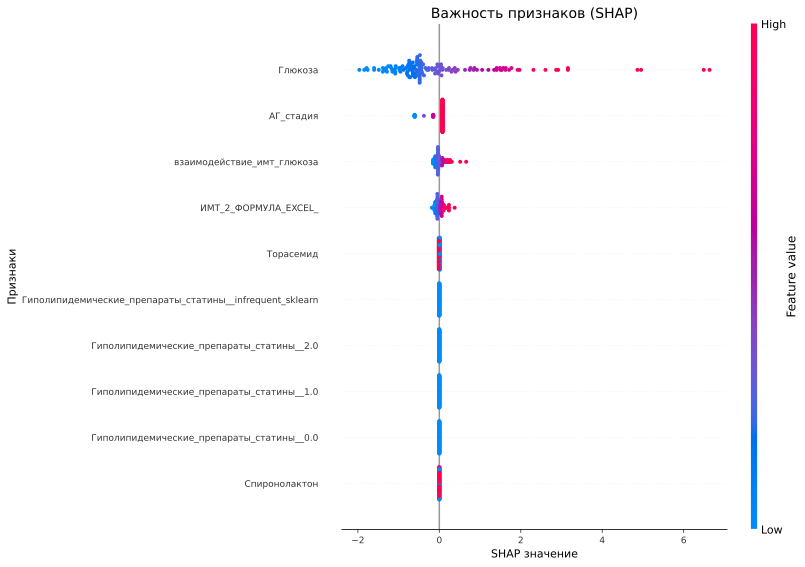

In [ ]:
shap.summary_plot(shap_values, X_sample_df, max_display=10, show=False)

fig = plt.gcf()
fig.set_size_inches(12, 8)
ax = plt.gca()
ax.tick_params(axis='y', labelsize=9)
ax.tick_params(axis='x', labelsize=9)
ax.set_ylabel('Признаки', fontsize=11)
ax.set_xlabel('SHAP значение', fontsize=11)
ax.set_title('Важность признаков (SHAP)', fontsize=14)
plt.tight_layout()
plt.show()

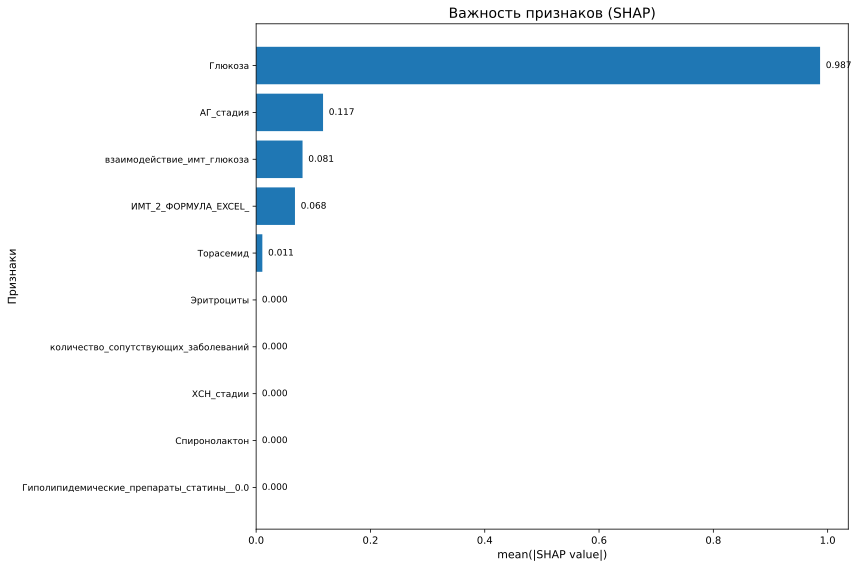

In [ ]:
# Используем напрямую массив значений
shap_values_array = shap_values.values

# Создаем свой bar plot для полного контроля
mean_abs_shap = np.mean(np.abs(shap_values_array), axis=0)
feature_importance = pd.DataFrame({
    'feature': X_sample_df.columns,
    'importance': mean_abs_shap
}).sort_values('importance', ascending=False).head(10)

# Создаем график
plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(feature_importance)), feature_importance['importance'])
plt.yticks(range(len(feature_importance)), feature_importance['feature'], fontsize=9)

# Добавляем значения
for i, (feature, importance) in enumerate(zip(feature_importance['feature'], feature_importance['importance'])):
    plt.text(importance + 0.01, i, f'{importance:.3f}', va='center', fontsize=9)

plt.xlabel('mean(|SHAP value|)', fontsize=11)
plt.ylabel('Признаки', fontsize=11)
plt.title('Важность признаков (SHAP)', fontsize=14)
plt.gca().invert_yaxis()  # Самый важный признак сверху
plt.tight_layout()
plt.show()

<h3>Confusion Matrix для лучшей модели<a class="tocSkip"> </h3>

Матрица ошибок (confusion matrix) — это таблица, которая показывает, как хорошо модель классифицирует объекты.

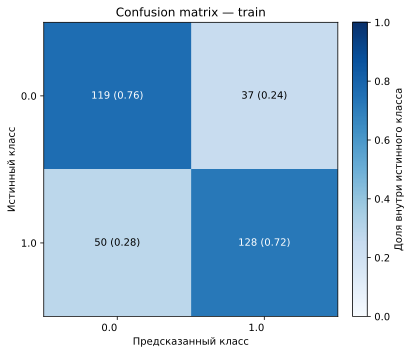

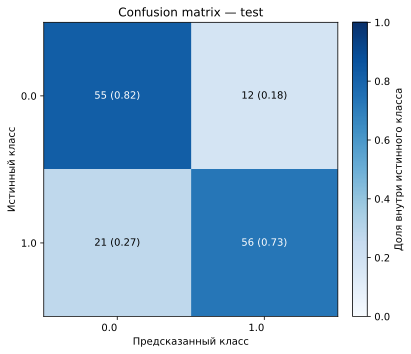

In [ ]:
# строим матрицу ошибок на трейне и тесте

labels_global = np.unique(np.concatenate([y_train, y_test]))
plot_cm_combo('train', X_train, y_train, grid_lr, labels=labels_global)
plot_cm_combo('test',  X_test,  y_test,  grid_lr, labels=labels_global)

##  Общий вывод

В рамках данного проекта была решена задача по разработке модели машинного обучения для прогнозирования риска развития сахарного диабета на основе медицинских данных пациентов.

**1. Подготовка данных:**
Исходный датасет, содержащий информацию о 484 пациентах и более 100 признаках, характеризовался большим количеством пропусков, наличием аномальных и некорректных значений, а также дублирующихся по смыслу признаков. Была проведена предобработка:
- Удалены признаки с высоким процентом пропусков и низкой информативностью.
- Исключены признаки, вызывающие утечку данных.
- Устранены аномалии и выбросы в числовых данных.
- Исправлены и унифицированы категориальные признаки со смешанными форматами данных.

**2. Отбор признаков:**

С помощью корреляции PhiK были отобраны 30 наиболее значимых признаков, связанных с целевой переменной.

Ключевыми предикторами оказались **уровень глюкозы**, **ИМТ**, а также показатели, стадия ХСН, стадия АГ и приёмом определённых препаратов (статины, диуретики).

**3. Моделирование и результаты:**

Были протестированы четыре модели: `LogisticRegression`, `RandomForestClassifier`, `CatBoostClassifier` и `LinearSVC`. В качестве основной метрики для оценки качества была выбрана F1-macro, так как она важна для сбалансированной оценки обоих классов.

- Наилучшие результаты на этапе кросс-валидации показала модель **LogisticRegression** с F1-macro **0.763**.
- При тестировании на отложенной выборке модель подтвердила свою эффективность, достигнув **F1-macro 0.77**. Модель продемонстрировала хороший баланс между точностью (precision: 0.82) и полнотой (recall: 0.73) для класса "диабет есть", что важно для минимизации пропуска реальных случаев заболевания.

**Итоговая рекомендация:**

Разработанная модель на основе логистической регрессии является эффективным, быстрым и легко интерпретируемым инструментом для предварительной оценки риска развития диабета. Дальнейшее улучшение модели возможно при сборе более полных и качественных данных по признакам, которые были отброшены из-за большого числа пропусков.

In [ ]:
# !pip list --format=freeze > requirements_pip.txt

<mark> а вот и код, который сохраняет полный список всех библиотек, которые установлены в окружении, т.е. в этот файл попадает вообще всё, даже те пакеты, которые проект не использует напрямую. Отсюда и 150 строк.